# EDA

Import des librairies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


 # Premier Nettoyage des données Projet Immo

## Import des données

In [2]:
immo_df = pd.read_csv("immo.csv", delimiter=",")

In [3]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

Explication des differentes colonnes: 
1.	**longitude**
2.	**latitude**
3.	**housingMedianAge**: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4.	**totalRooms**: Nombre total de chambres dans un bloc
5.	**totalBedrooms**: Nombre total de chambres dans un bloc
6.	**population**: Nombre total de personnes résidant dans un bloc
7.	**households**: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8.	**medianIncome**: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9.	**medianHouseValue**: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10.	**oceanProximity**: Situation de la maison par rapport à la mer


## Exploration des données 

### Observation des données

In [4]:
immo_df.shape

(16512, 11)

On observe qu'il y a des 11 colonnes et 16512 lignes

In [5]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


On peut observer que pour la majorité des colonnes il n'y a pas de données manquante ( 16512 lignes remplis) sauf pour total_bedrooms. On peut aussi observer que la majorité des colonnes sont des nombres sauf la colonnes Ocean_proximity.

### La colonne Unnamed

La colonne unnamed ne faisait pas partie du descriptif des colonnes. 

In [6]:
immo_df.duplicated(['Unnamed: 0']).value_counts()

False    16512
dtype: int64

La colonne Unnamed: 0 ne contient que des valeurs unique, cette colonne doit correspondre à un index

In [7]:
immo_df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
immo_df

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

### Observation des colonnes longitude et lattitude

Dans un premier temps, j'ai regardé la densité de population en fonction de la localisation (longitude/latitude)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

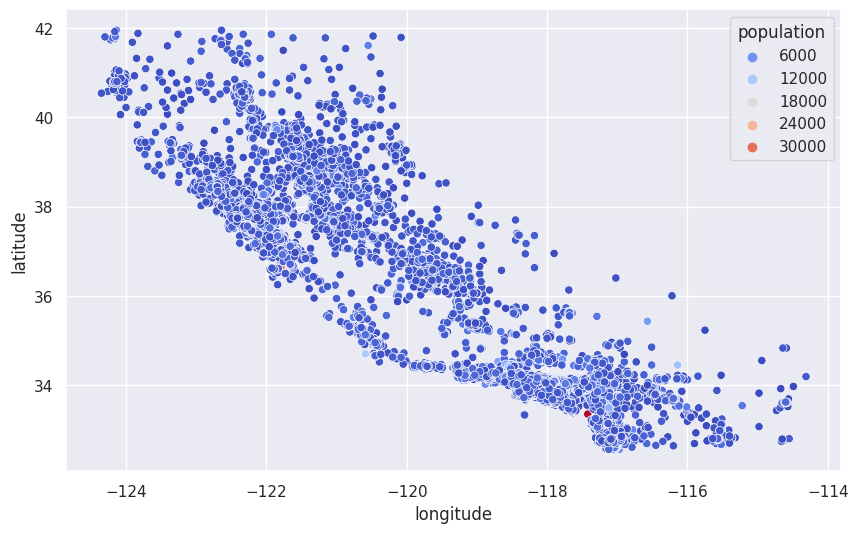

In [8]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['population'],palette= 'coolwarm')

On peut deja observé que la majorité des points sont semblable a part quelque differences

J'ai ensuite regardé le nombre total de menage en fonction de la localisation (longitude/latitude)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

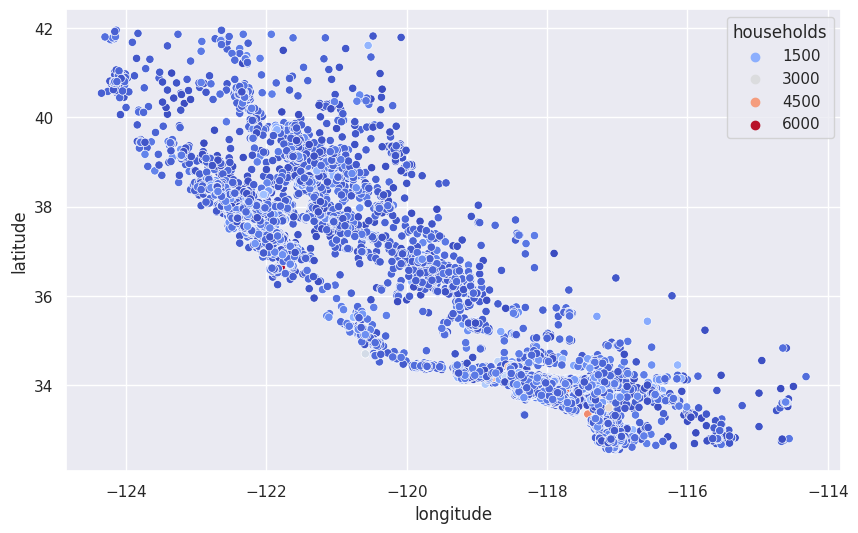

In [9]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['households'],palette= 'coolwarm')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

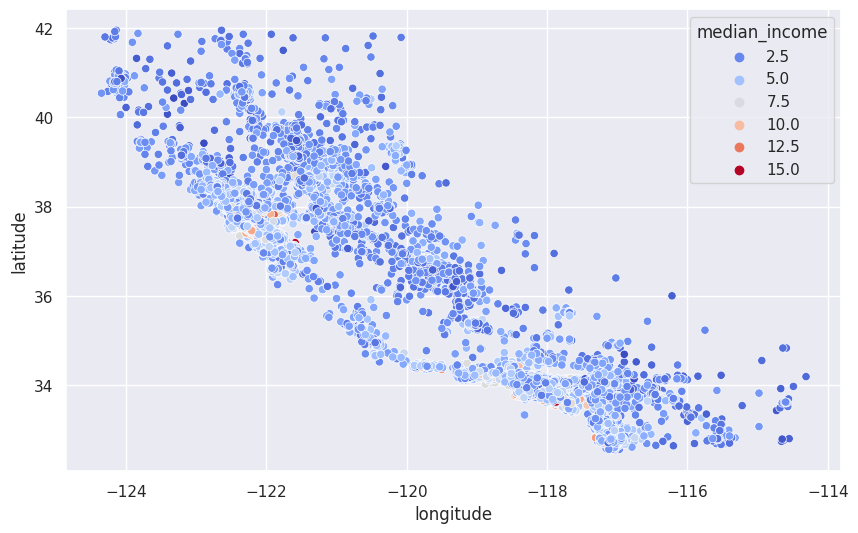

In [10]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)}, palette = "Set1")
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['median_income'],palette= 'coolwarm')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

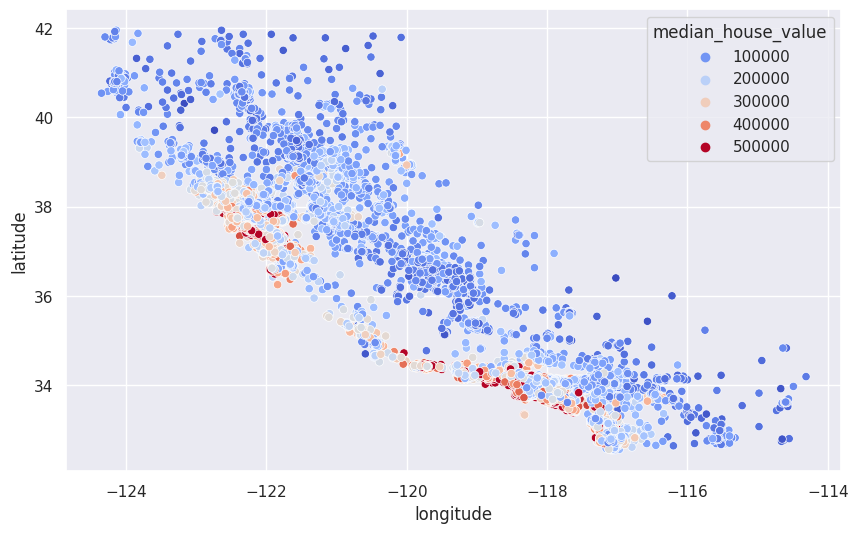

In [11]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['median_house_value'],palette= "coolwarm")

On peut observer que le prix de l'immobilier semble relativement egale sauf sur deux zone localisé prés de la mer. 

### Données dupliqué 

Je voulais voir s'il y avait des doublons au niveau de la localisation et voir si c'etait vraiment des doublons ou non

In [12]:
immo_df.duplicated().sum()

0

Il ne semble pas y avoir de duplicated mais je vais verifier s'il y a des localisation identique 

In [13]:
duplicate = immo_df[immo_df.duplicated(subset=['longitude','latitude'], keep= False)]
duplicate.sort_values(by= ['longitude'], ascending= False)


index  longitude  latitude  housing_median_age  total_rooms  \
11750   2696    -115.37     32.82                14.0       1276.0   
11563   2700    -115.37     32.81                32.0        741.0   
1438    2695    -115.37     32.81                23.0       1458.0   
9183    2697    -115.37     32.82                30.0       1602.0   
9440    2677    -115.52     32.98                32.0       1615.0   
...      ...        ...       ...                 ...          ...   
7973    2541    -124.17     40.80                52.0       1606.0   
3625    2553    -124.18     40.78                37.0       1453.0   
4808    2554    -124.18     40.78                33.0       1076.0   
12559   2548    -124.18     40.79                40.0       1398.0   
393     2547    -124.18     40.79                39.0       1836.0   

       total_bedrooms  population  households  median_income  \
11750           270.0       867.0       261.0         1.9375   
11563           191.0       623.0       169.0         1.7604   
1438            294.0       866.0       275.0         2.3594   
9183            322.0      1130.0       335.0         3.5735   
9440            382.0      1307.0       345.0         1.4583   
...               ...         ...         ...            ...   
7973            419.0       891.0       367.0         1.5850   
3625            293.0       867.0       310.0         2.5536   
4808            222.0       656.0       236.0         2.5096   
12559           311.0       788.0       279.0         1.4668   
393             352.0       883.0       337.0         1.7450   

       median_house_value ocean_proximity  
11750             80900.0          INLAND  
11563             68600.0          INLAND  
1438              74300.0          INLAND  
9183              71100.0          INLAND  
9440              58600.0          INLAND  
...                   ...             ...  
7973              75500.0      NEAR OCEAN  
3625              70200.0      NEAR OCEAN  
4808              72200.0      NEAR OCEAN  
12559             64600.0      NEAR OCEAN  
393               70500.0      NEAR OCEAN  

[9081 rows x 11 columns]

In [14]:
visu_test= duplicate.loc[duplicate.longitude == -124.18]
visu_test

index  longitude  latitude  housing_median_age  total_rooms  \
393     2547    -124.18     40.79                39.0       1836.0   
3625    2553    -124.18     40.78                37.0       1453.0   
4808    2554    -124.18     40.78                33.0       1076.0   
12559   2548    -124.18     40.79                40.0       1398.0   

       total_bedrooms  population  households  median_income  \
393             352.0       883.0       337.0         1.7450   
3625            293.0       867.0       310.0         2.5536   
4808            222.0       656.0       236.0         2.5096   
12559           311.0       788.0       279.0         1.4668   

       median_house_value ocean_proximity  
393               70500.0      NEAR OCEAN  
3625              70200.0      NEAR OCEAN  
4808              72200.0      NEAR OCEAN  
12559             64600.0      NEAR OCEAN

In [15]:
duplicate.loc[duplicate.longitude == -115.52]

index  longitude  latitude  housing_median_age  total_rooms  \
6438   2691    -115.52     32.97                10.0       1879.0   
6804   2678    -115.52     32.98                21.0       1302.0   
7573   2690    -115.52     32.97                24.0       1617.0   
9440   2677    -115.52     32.98                32.0       1615.0   

      total_bedrooms  population  households  median_income  \
6438           387.0      1376.0       337.0         1.9911   
6804           327.0      1244.0       316.0         2.2054   
7573           366.0      1416.0       401.0         1.9750   
9440           382.0      1307.0       345.0         1.4583   

      median_house_value ocean_proximity  
6438             67500.0          INLAND  
6804             66400.0          INLAND  
7573             66400.0          INLAND  
9440             58600.0          INLAND

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

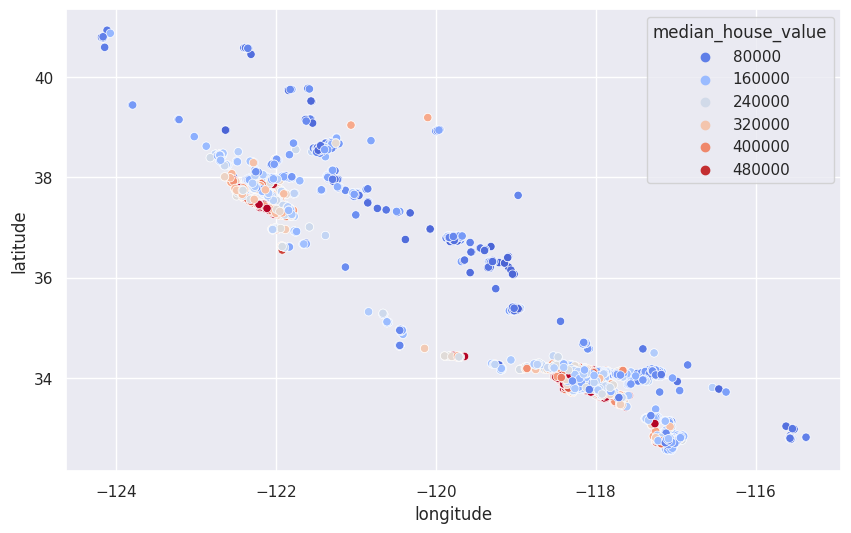

In [16]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=duplicate["longitude"], y=duplicate['latitude'], hue= duplicate['median_house_value'],palette= "coolwarm")

Bien que la longitude et la latitude sont identique, on ne peux pas savoir s'il ce sont des vrais duplicats ou alors on a pas une localisation suffisament precise.  
Pour le moment je decide de ne pas les supprimé mais je tenterai de le faire pour une itération

###  transformation de la colonne ocean_proximity

In [17]:
immo_df.ocean_proximity.value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [18]:
immo_df['localisation'] = immo_df.ocean_proximity.apply(lambda x: 
                                            4 if x == 'INLAND'
                                            else 3 if x== '<1H OCEAN'
                                            else 2 if x == 'NEAR BAY'
                                            else 1 if x == 'NEAR OCEAN'
                                            else 0 )
immo_df


index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  
0                 72000.0          INLAND             4  
1                274100.0       <1H OCEAN             3  
2                 58300.0          INLAND             4  
3                200000.0       <1H OCEAN             3  
4                117900.0          INLAND             4  
...                   ...             ...           ...  
16507             93800.0          INLAND             4  
16508            103100.0        NEAR BAY             2  
16509            192600.0          INLAND             4  
16510            153500.0       <1H OCEAN             3  
16511             81100.0      NEAR OCEAN             1  

[16512 rows x 12 columns]

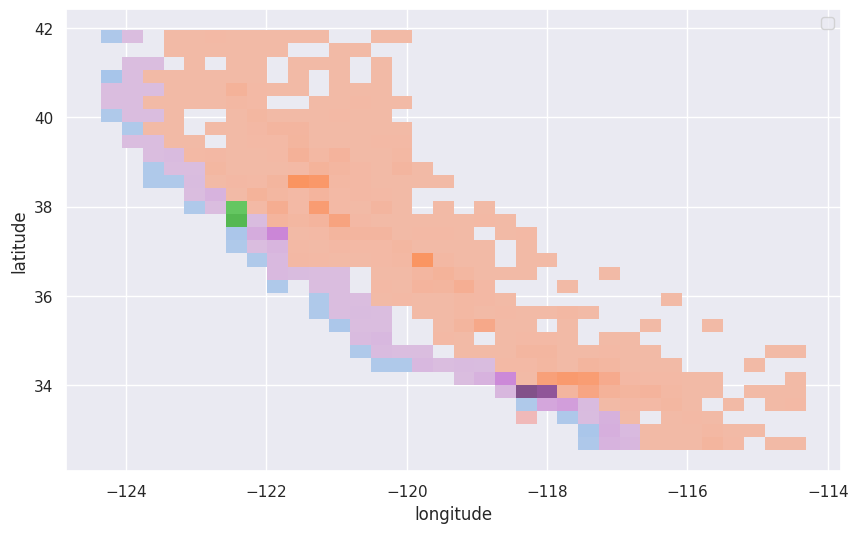

In [19]:
sns.histplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['localisation'], palette = 'Set1' )
plt.legend(labels=['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND'])
plt.show()

In [20]:
feature_localisation= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','localisation']]

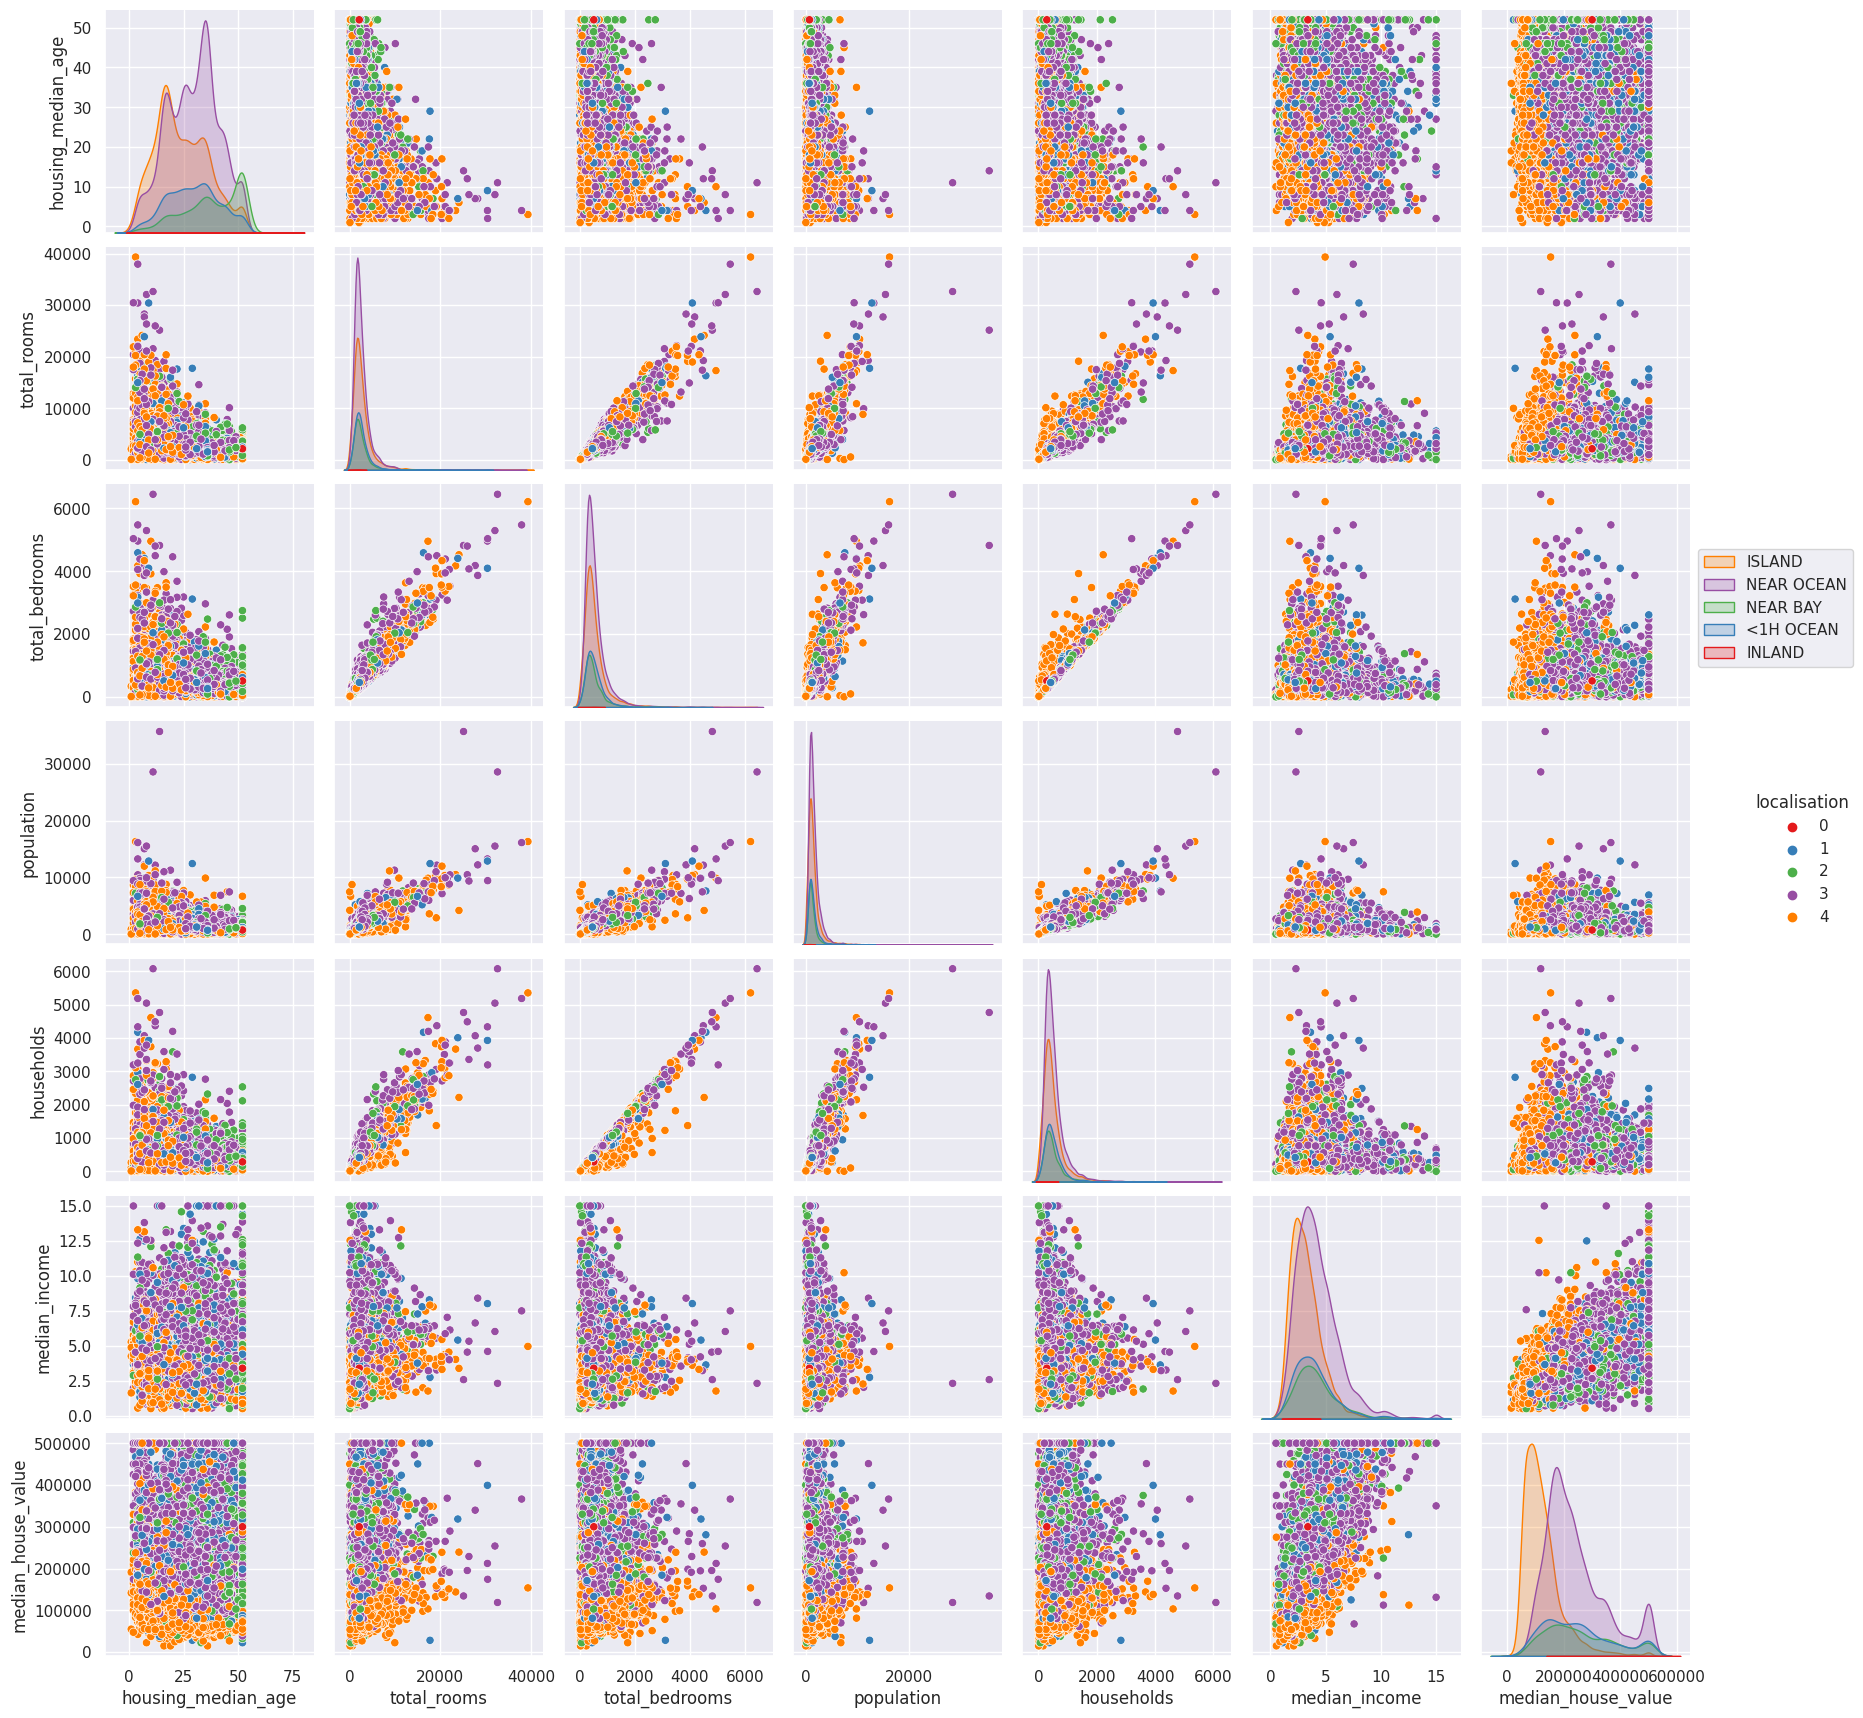

In [21]:
sns.pairplot(feature_localisation, hue="localisation", palette="Set1")

plt.legend(labels=['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND'], loc = 2, bbox_to_anchor = (1,5))
plt.show()

On peut voir une tendance pour 
on peut observer que les points

### Données manquante : Total Bedrooms

In [22]:
immo_df.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
localisation            0
dtype: int64

In [23]:
immo_df['total_bedrooms'].isnull().value_counts()

False    16336
True       176
Name: total_bedrooms, dtype: int64

Une des colonnes ( total_bedrooms) contient des valeurs null (176 sur 16512).

In [24]:
null = immo_df.loc[immo_df['total_bedrooms'].isnull()]
null

index  longitude  latitude  housing_median_age  total_rooms  \
33      5723    -118.23     34.18                45.0       2332.0   
171     2578    -124.06     40.86                34.0       4183.0   
178    10033    -121.08     39.22                30.0       2188.0   
179    19485    -120.98     37.66                10.0        934.0   
259    19766    -122.10     40.03                25.0       2516.0   
...      ...        ...       ...                 ...          ...   
16002  17202    -119.73     34.44                38.0       1729.0   
16089  17041    -122.28     37.51                33.0       4719.0   
16214   4591    -118.28     34.06                42.0       2472.0   
16228   9942    -122.23     38.17                45.0        350.0   
16323   2301    -119.78     36.82                25.0       5016.0   

       total_bedrooms  population  households  median_income  \
33                NaN       943.0       339.0         8.1132   
171               NaN      1891.0       669.0         3.2216   
178               NaN      1033.0       437.0         2.1419   
179               NaN       401.0       255.0         0.9336   
259               NaN      1266.0       494.0         1.7566   
...               ...         ...         ...            ...   
16002             NaN       801.0       395.0         3.1364   
16089             NaN      1980.0       757.0         6.1064   
16214             NaN      3795.0      1179.0         1.2254   
16228             NaN       225.0        72.0         1.8942   
16323             NaN      2133.0       928.0         3.6250   

       median_house_value ocean_proximity  localisation  
33               446600.0       <1H OCEAN             3  
171               98100.0      NEAR OCEAN             1  
178              105200.0          INLAND             4  
179              127100.0          INLAND             4  
259               58400.0          INLAND             4  
...                   ...             ...           ...  
16002            357500.0      NEAR OCEAN             1  
16089            405000.0      NEAR OCEAN             1  
16214            162500.0       <1H OCEAN             3  
16228            216700.0        NEAR BAY             2  
16323             89500.0          INLAND             4  

[176 rows x 12 columns]

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

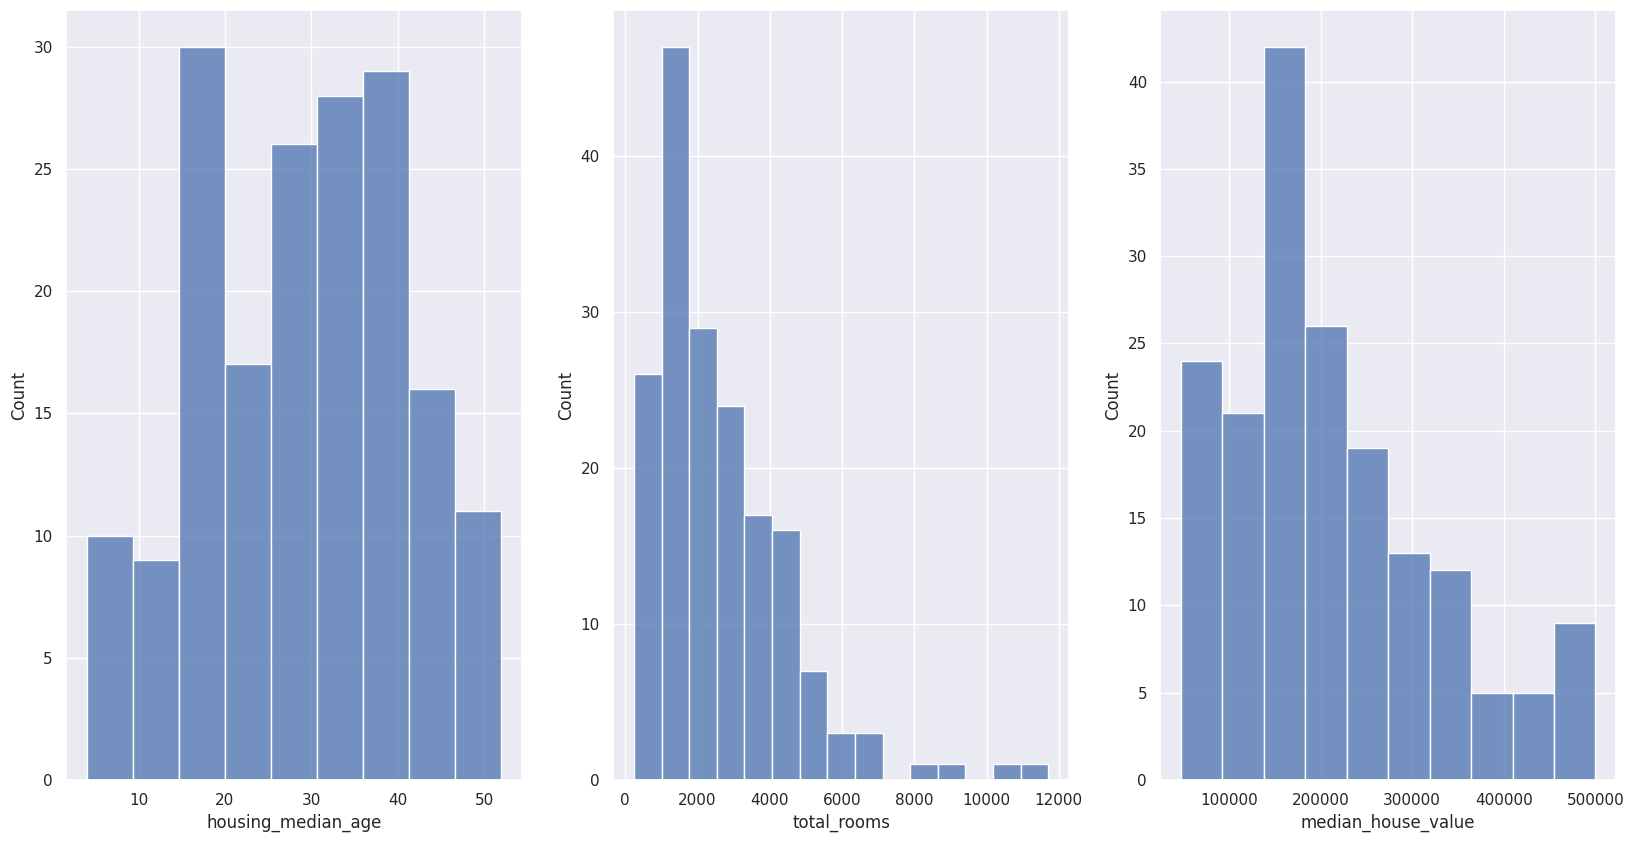

In [25]:
sns.set(rc={"figure.figsize":(20,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.histplot(x=null["housing_median_age"], ax=ax[0])
sns.histplot(x=null["total_rooms"], ax=ax[1])
sns.histplot(x=null["median_house_value"], ax=ax[2])


Imputation ? suppression ? Realisation d'une veille pour choisir quel technique me semble le plus addapté a la situation. Données qui seront potentiellement reprise lors de la prochaine iteration de nettoyage si le choix ne conviens pas 

### Remplacement des données par 0

In [26]:
immo_df.isnull().mean()*100

index                 0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.065891
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
localisation          0.000000
dtype: float64

Ici les donnée manquante ne represente que 1% des donnée

Pour le premier model je decide de remplacé les Na par des 0

In [27]:
immo= immo_df.copy()

In [28]:
immo['total_bedrooms'].fillna(0, inplace=True)
immo

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  
0                 72000.0          INLAND             4  
1                274100.0       <1H OCEAN             3  
2                 58300.0          INLAND             4  
3                200000.0       <1H OCEAN             3  
4                117900.0          INLAND             4  
...                   ...             ...           ...  
16507             93800.0          INLAND             4  
16508            103100.0        NEAR BAY             2  
16509            192600.0          INLAND             4  
16510            153500.0       <1H OCEAN             3  
16511             81100.0      NEAR OCEAN             1  

[16512 rows x 12 columns]

### Observation descriptive des données

In [29]:
immo_df.describe(include='all')

index     longitude      latitude  housing_median_age  \
count   16512.000000  16512.000000  16512.000000        16512.000000   
unique           NaN           NaN           NaN                 NaN   
top              NaN           NaN           NaN                 NaN   
freq             NaN           NaN           NaN                 NaN   
mean    10295.498789   -119.564046     35.626523           28.624516   
std      5941.973488      2.005033      2.139150           12.597980   
min         0.000000   -124.350000     32.540000            1.000000   
25%      5178.750000   -121.790000     33.930000           18.000000   
50%     10263.500000   -118.490000     34.250000           29.000000   
75%     15438.250000   -118.010000     37.710000           37.000000   
max     20639.000000   -114.310000     41.950000           52.000000   

         total_rooms  total_bedrooms    population    households  \
count   16512.000000    16336.000000  16512.000000  16512.000000   
unique           NaN             NaN           NaN           NaN   
top              NaN             NaN           NaN           NaN   
freq             NaN             NaN           NaN           NaN   
mean     2644.170603      539.319540   1435.017260    501.135962   
std      2213.946369      425.207704   1158.151967    385.650673   
min         6.000000        2.000000      3.000000      2.000000   
25%      1446.000000      296.000000    788.000000    280.000000   
50%      2116.000000      435.000000   1168.000000    410.000000   
75%      3154.000000      647.000000   1738.000000    606.000000   
max     39320.000000     6445.000000  35682.000000   6082.000000   

        median_income  median_house_value ocean_proximity  localisation  
count    16512.000000        16512.000000           16512  16512.000000  
unique            NaN                 NaN               5           NaN  
top               NaN                 NaN       <1H OCEAN           NaN  
freq              NaN                 NaN            7312           NaN  
mean         3.864091       206509.251453             NaN      2.946827  
std          1.893244       115225.957661             NaN      0.972186  
min          0.499900        14999.000000             NaN      0.000000  
25%          2.562500       119400.000000             NaN      3.000000  
50%          3.531300       179300.000000             NaN      3.000000  
75%          4.733225       264500.000000             NaN      4.000000  
max         15.000100       500001.000000             NaN      4.000000

<AxesSubplot:>

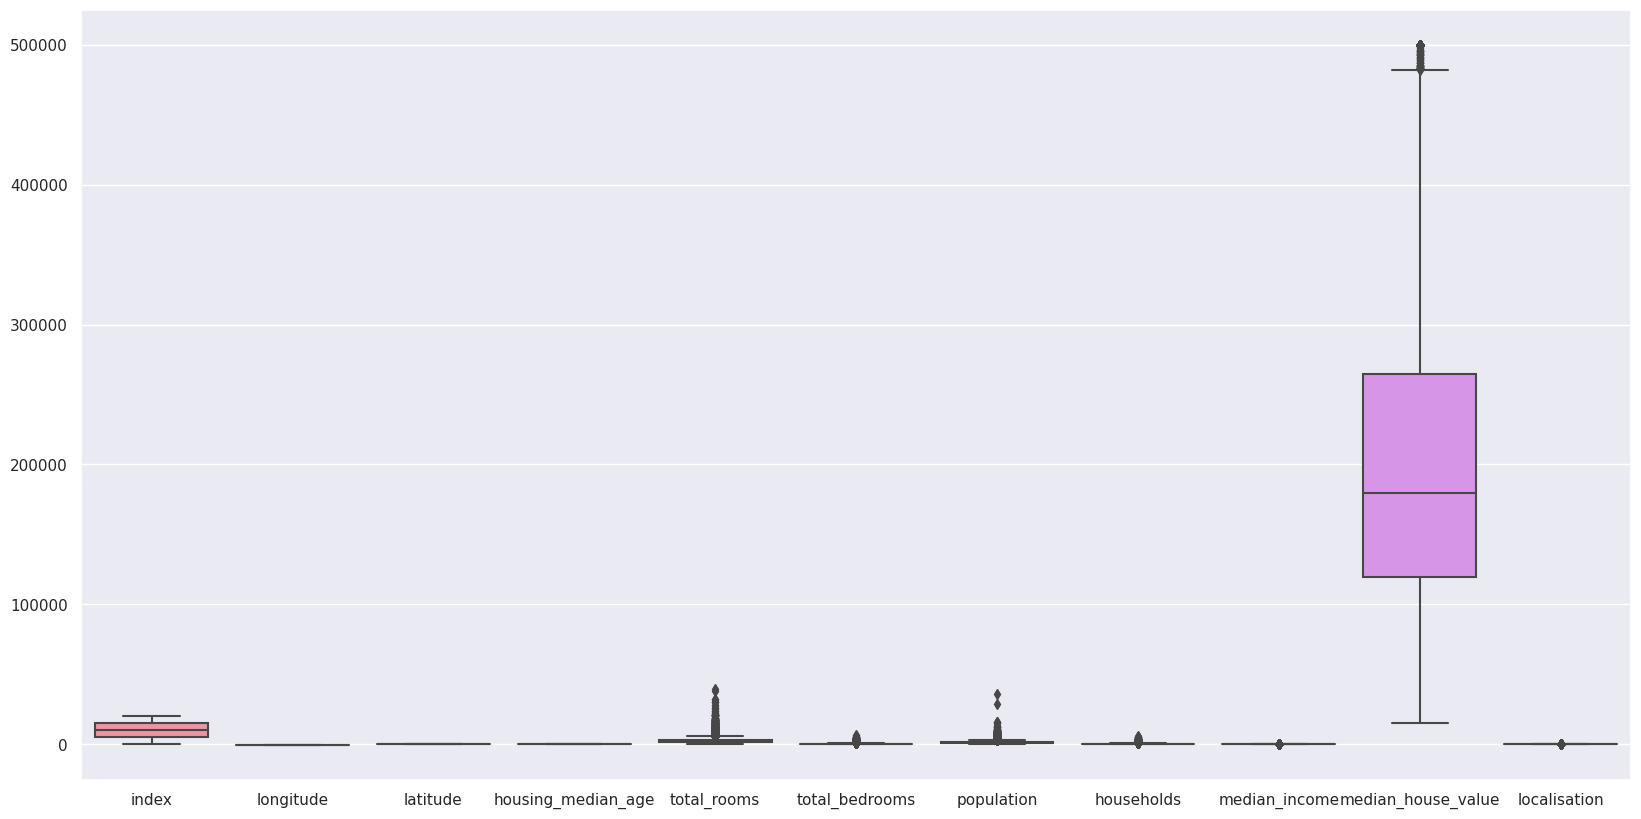

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data=immo_df)

<AxesSubplot:ylabel='median_income'>

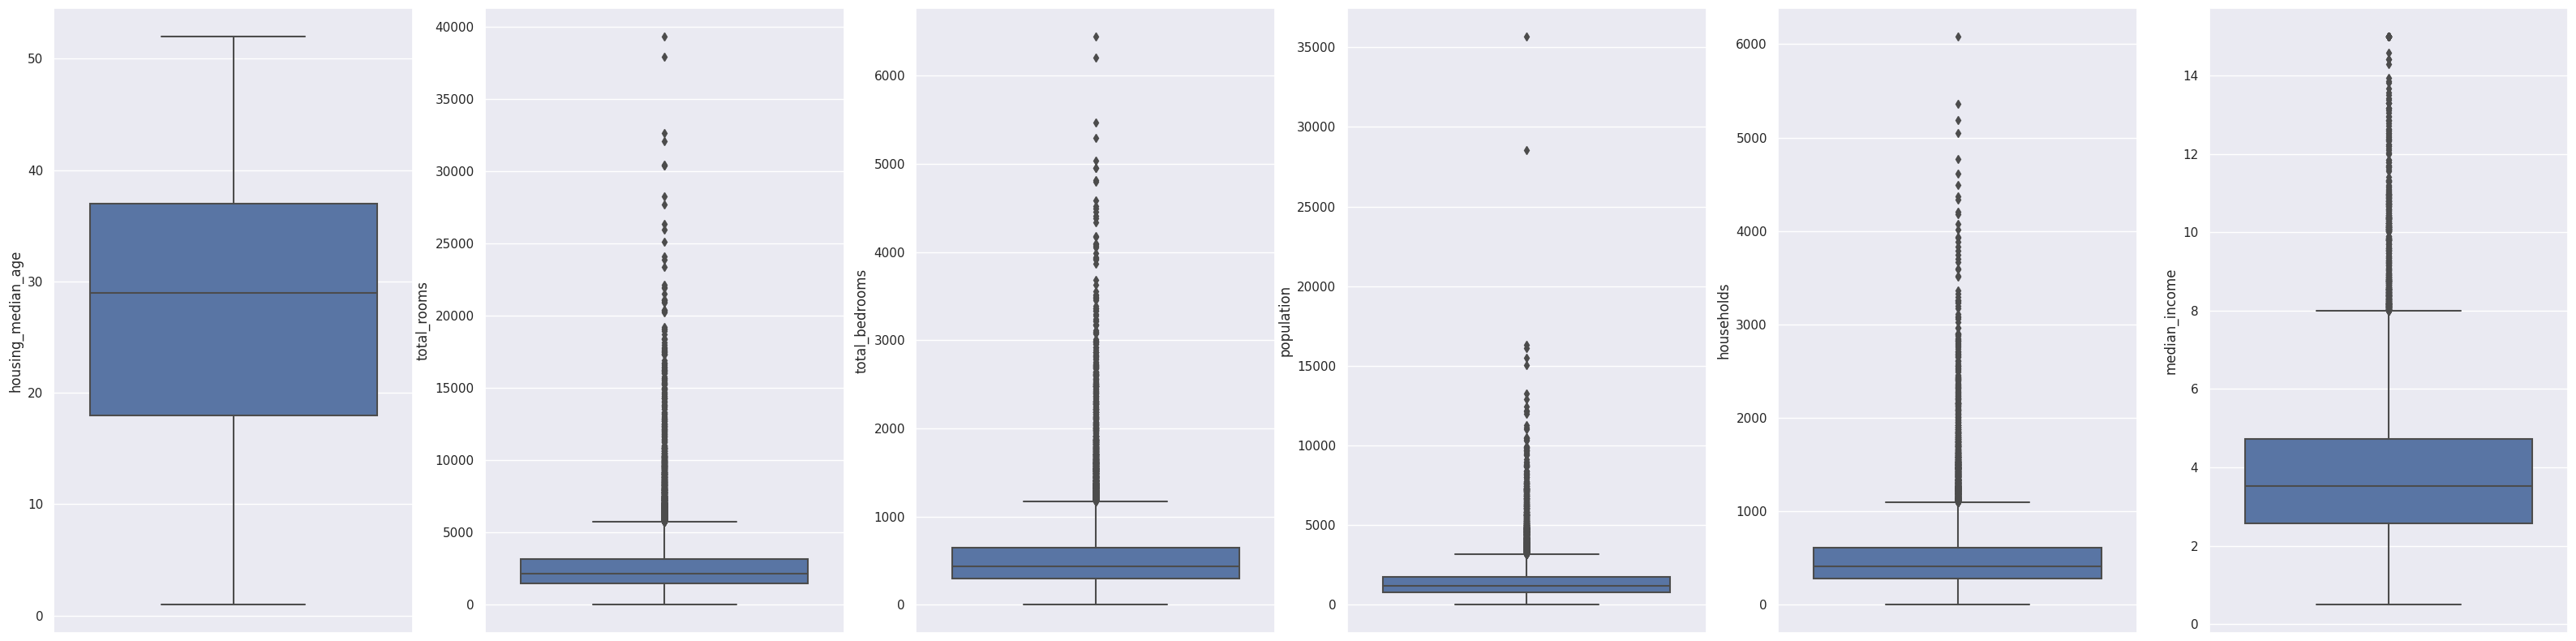

In [31]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,6)
sns.boxplot(y=immo_df["housing_median_age"], ax=ax[0])
sns.boxplot(y=immo_df["total_rooms"], ax=ax[1])
sns.boxplot(y=immo_df["total_bedrooms"], ax=ax[2])
sns.boxplot(y=immo_df["population"], ax=ax[3])
sns.boxplot(y=immo_df["households"], ax=ax[4])
sns.boxplot(y=immo_df["median_income"], ax=ax[5])

### Recherche des outliers

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

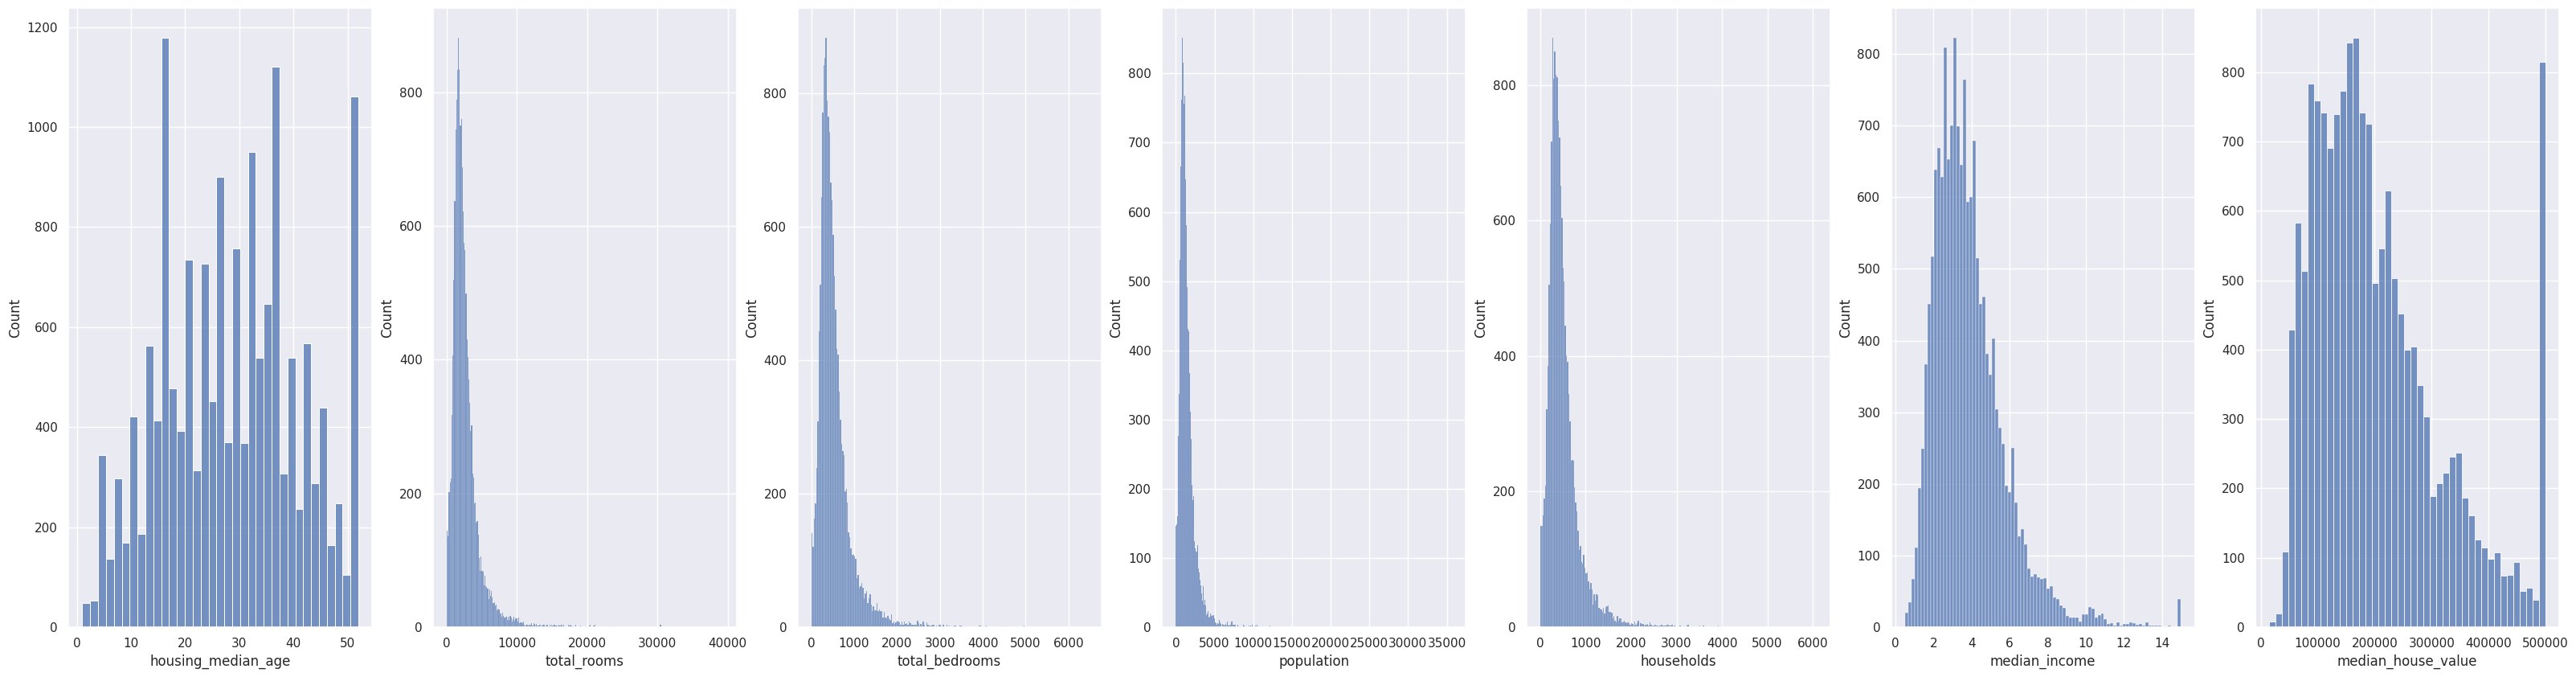

In [32]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df["population"], ax=ax[3])
sns.histplot(x=immo_df["households"], ax=ax[4])
sns.histplot(x=immo_df["median_income"], ax=ax[5])
sns.histplot(x=immo_df["median_house_value"], ax=ax[6])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

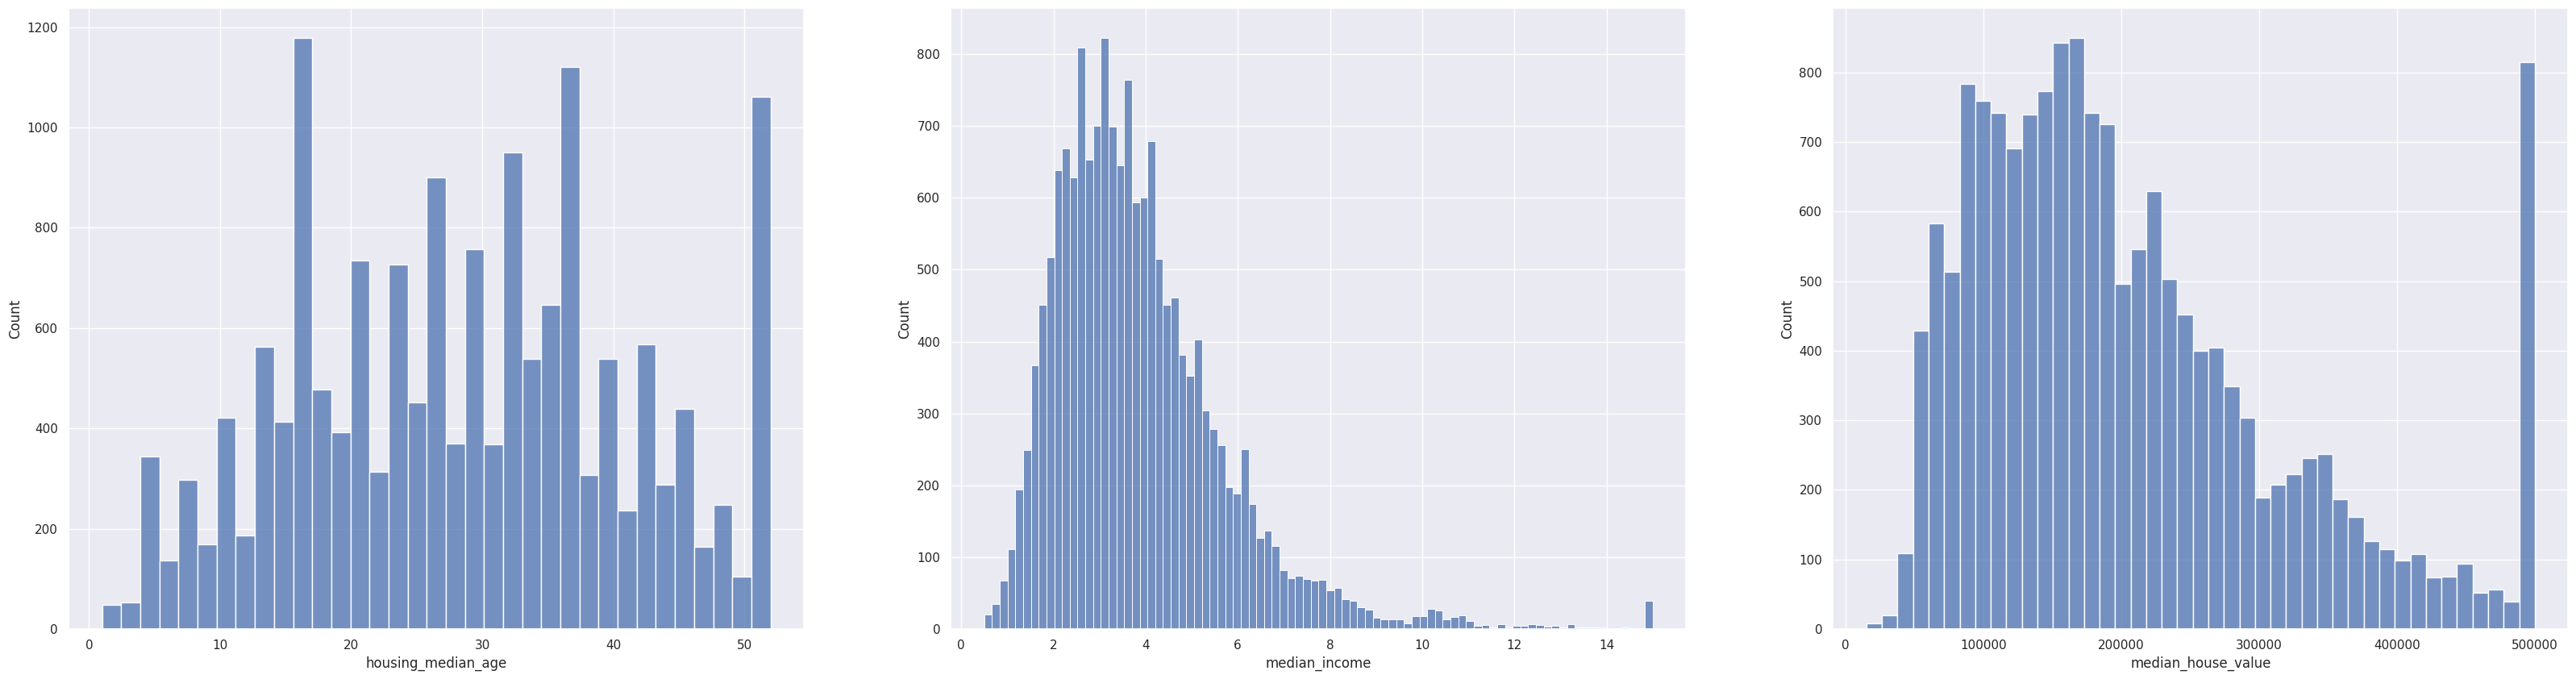

In [33]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["median_income"], ax=ax[1])
sns.histplot(x=immo_df["median_house_value"], ax=ax[2])

In [34]:
q1=np.quantile(immo_df['median_income'],0.25)
q3=np.quantile(immo_df['median_income'],0.75)
out= (q3 +1.5*(q3-q1)) 
outlier=immo_df.loc[immo_df['median_income']> out ]
outlier = outlier.sort_values(by='median_income', ascending = False)
outlier

index  longitude  latitude  housing_median_age  total_rooms  \
13780  15693    -122.44     37.79                52.0       1447.0   
6599    8852    -118.42     34.08                48.0       2413.0   
2252    4352    -118.37     34.10                37.0        407.0   
8465    1566    -121.96     37.74                 2.0        200.0   
13846  17118    -122.14     37.50                46.0         30.0   
...      ...        ...       ...                 ...          ...   
16125   8635    -118.40     33.88                35.0       1060.0   
9523   20248    -119.23     34.25                28.0         26.0   
10852   9405    -122.53     37.87                20.0       1814.0   
10769   6719    -118.13     34.13                52.0       2826.0   
3762   20388    -118.90     34.20                16.0       6510.0   

       total_bedrooms  population  households  median_income  \
13780           186.0       483.0       181.0        15.0001   
6599            261.0       770.0       248.0        15.0001   
2252             67.0       100.0        47.0        15.0001   
8465             20.0        25.0         9.0        15.0001   
13846             4.0        13.0         5.0        15.0001   
...               ...         ...         ...            ...   
16125           191.0       444.0       196.0         8.0015   
9523              3.0        29.0         9.0         8.0000   
10852           282.0       658.0       253.0         7.9977   
10769           381.0       924.0       365.0         7.9976   
3762            817.0      2304.0       778.0         7.9943   

       median_house_value ocean_proximity  localisation  
13780            500001.0        NEAR BAY             2  
6599             500001.0       <1H OCEAN             3  
2252             500001.0       <1H OCEAN             3  
8465             350000.0       <1H OCEAN             3  
13846            500001.0        NEAR BAY             2  
...                   ...             ...           ...  
16125            500001.0       <1H OCEAN             3  
9523             275000.0      NEAR OCEAN             1  
10852            400000.0        NEAR BAY             2  
10769            500001.0       <1H OCEAN             3  
3762             452100.0       <1H OCEAN             3  

[555 rows x 12 columns]

In [35]:
outliers_value= outlier[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','localisation']]
outliers_value

housing_median_age  total_rooms  total_bedrooms  population  \
13780                52.0       1447.0           186.0       483.0   
6599                 48.0       2413.0           261.0       770.0   
2252                 37.0        407.0            67.0       100.0   
8465                  2.0        200.0            20.0        25.0   
13846                46.0         30.0             4.0        13.0   
...                   ...          ...             ...         ...   
16125                35.0       1060.0           191.0       444.0   
9523                 28.0         26.0             3.0        29.0   
10852                20.0       1814.0           282.0       658.0   
10769                52.0       2826.0           381.0       924.0   
3762                 16.0       6510.0           817.0      2304.0   

       households  median_income  median_house_value  localisation  
13780       181.0        15.0001            500001.0             2  
6599        248.0        15.0001            500001.0             3  
2252         47.0        15.0001            500001.0             3  
8465          9.0        15.0001            350000.0             3  
13846         5.0        15.0001            500001.0             2  
...           ...            ...                 ...           ...  
16125       196.0         8.0015            500001.0             3  
9523          9.0         8.0000            275000.0             1  
10852       253.0         7.9977            400000.0             2  
10769       365.0         7.9976            500001.0             3  
3762        778.0         7.9943            452100.0             3  

[555 rows x 8 columns]

 3 :'<1H OCEAN'
 1 :'NEAR OCEAN'
 2 :'NEAR BAY'
 4 : 'INLAND'

In [36]:
outliers_value['localisation'].value_counts()

3    332
1     95
2     88
4     40
Name: localisation, dtype: int64

<AxesSubplot:xlabel='localisation', ylabel='population'>

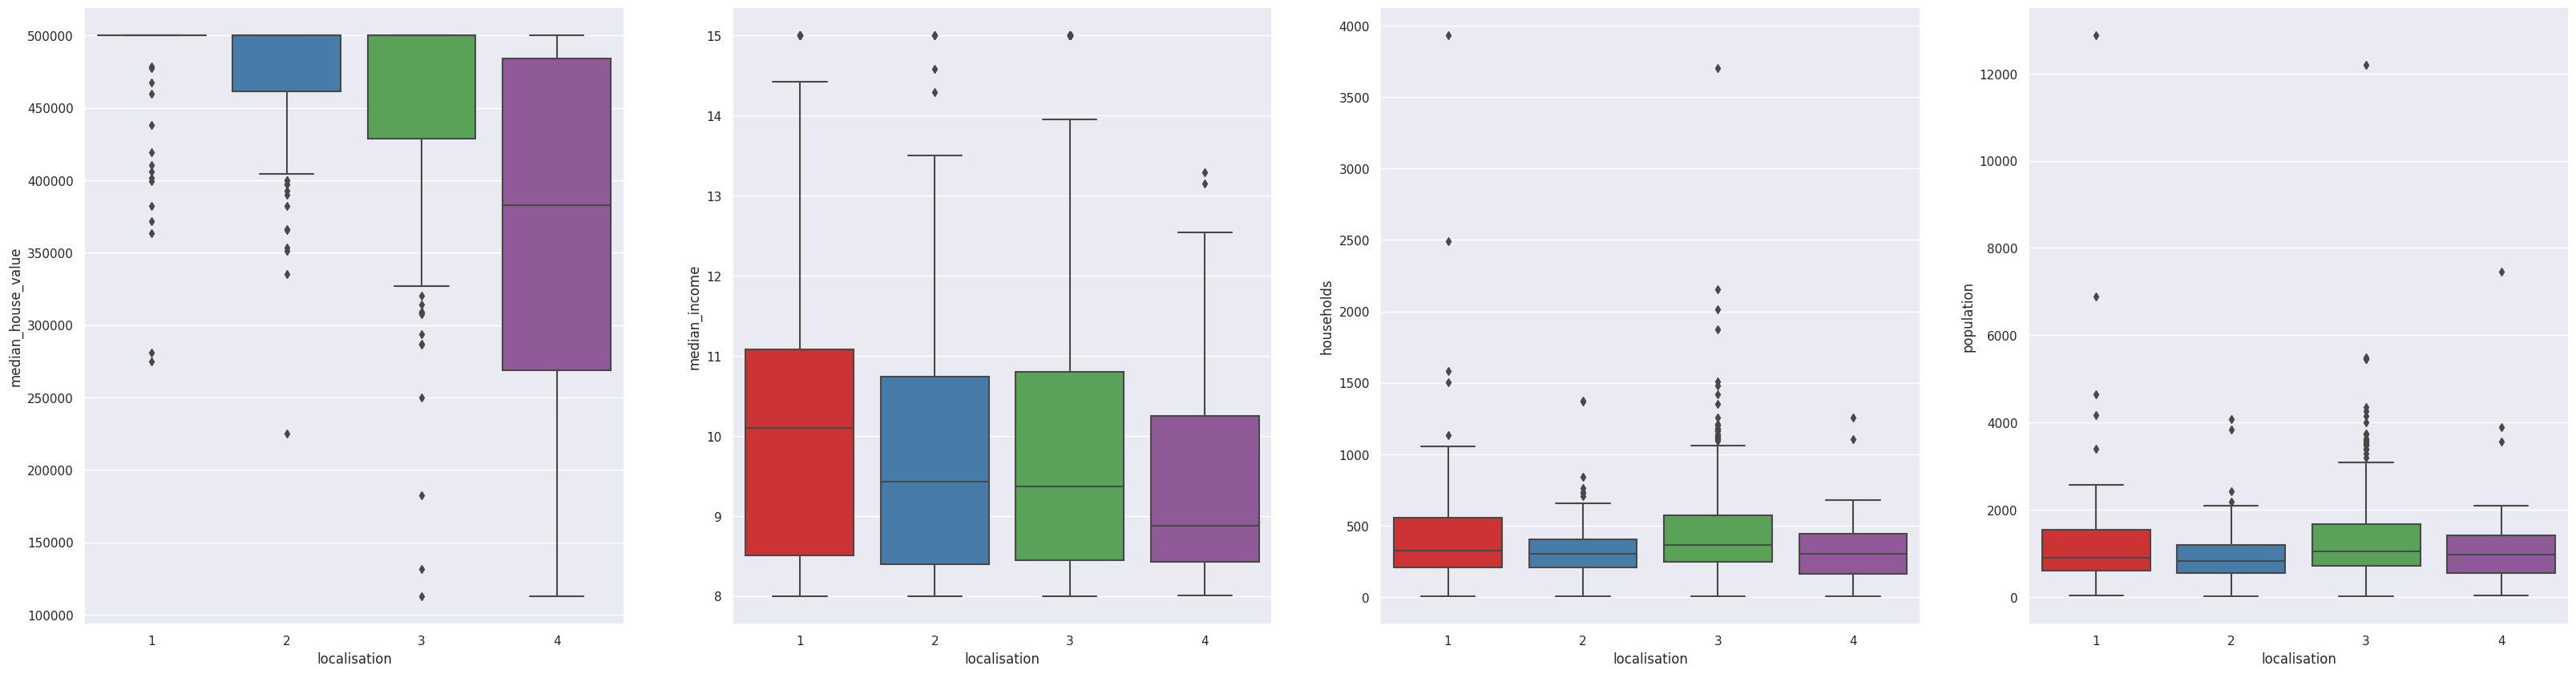

In [37]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,4)
sns.boxplot(y=outliers_value["median_house_value"],x=outliers_value['localisation'],palette = "Set1", ax=ax[0])
sns.boxplot(y=outliers_value["median_income"],x=outliers_value['localisation'],palette = "Set1", ax=ax[1])
sns.boxplot(y=outliers_value["households"],x=outliers_value['localisation'],palette = "Set1", ax=ax[2])
sns.boxplot(y=outliers_value["population"],x=outliers_value['localisation'],palette = "Set1", ax=ax[3])


<AxesSubplot:xlabel='median_income', ylabel='Count'>

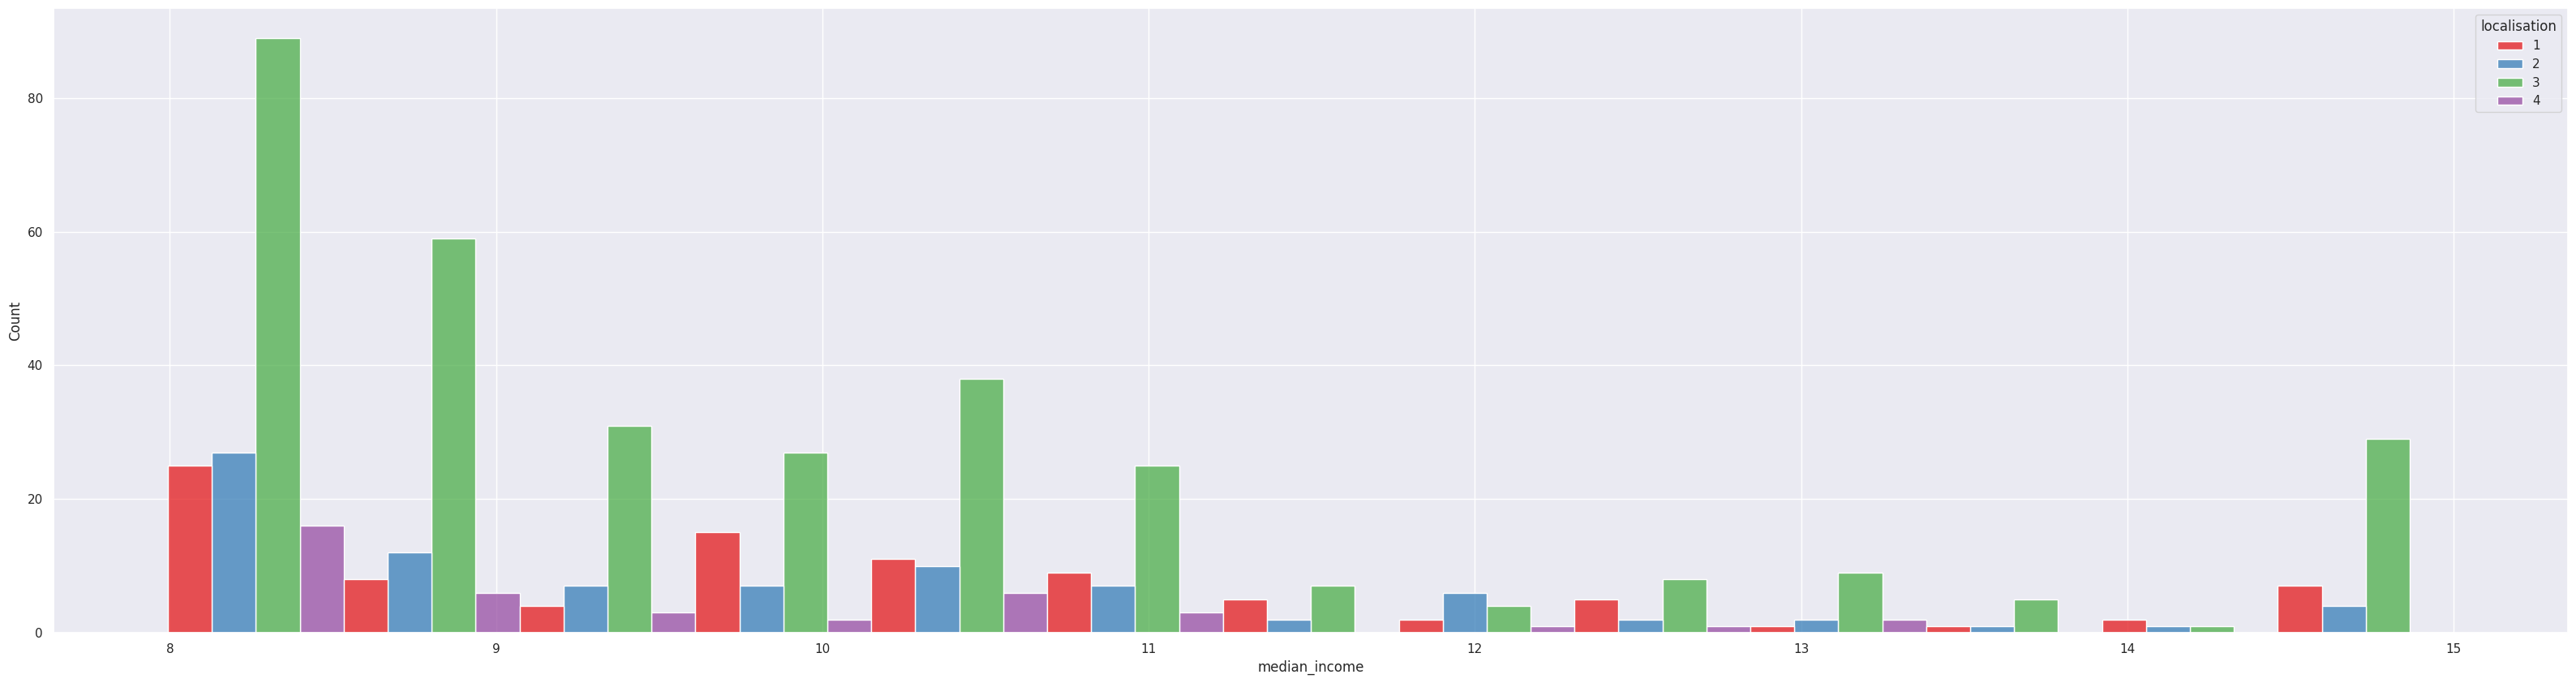

In [38]:
sns.histplot(x=outliers_value["median_income"], hue= outliers_value['localisation'], multiple ="dodge", palette = "Set1")

## visualisation de la normalité 

In [39]:
pip install scs


Note: you may need to restart the kernel to use updated packages.


In [40]:
import scs
from scipy.stats import norm

In [41]:
def var_hist(var, i):
    subset = immo_df[var]
    n_dataset = len(immo_df)
    xbar = np.mean(subset) # Moyenne
    sprime = np.std(subset, ddof=1) # Ecart-type
    sprime2 = np.var(subset, ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(subset.min(),subset.max(),0.05)
    y = norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

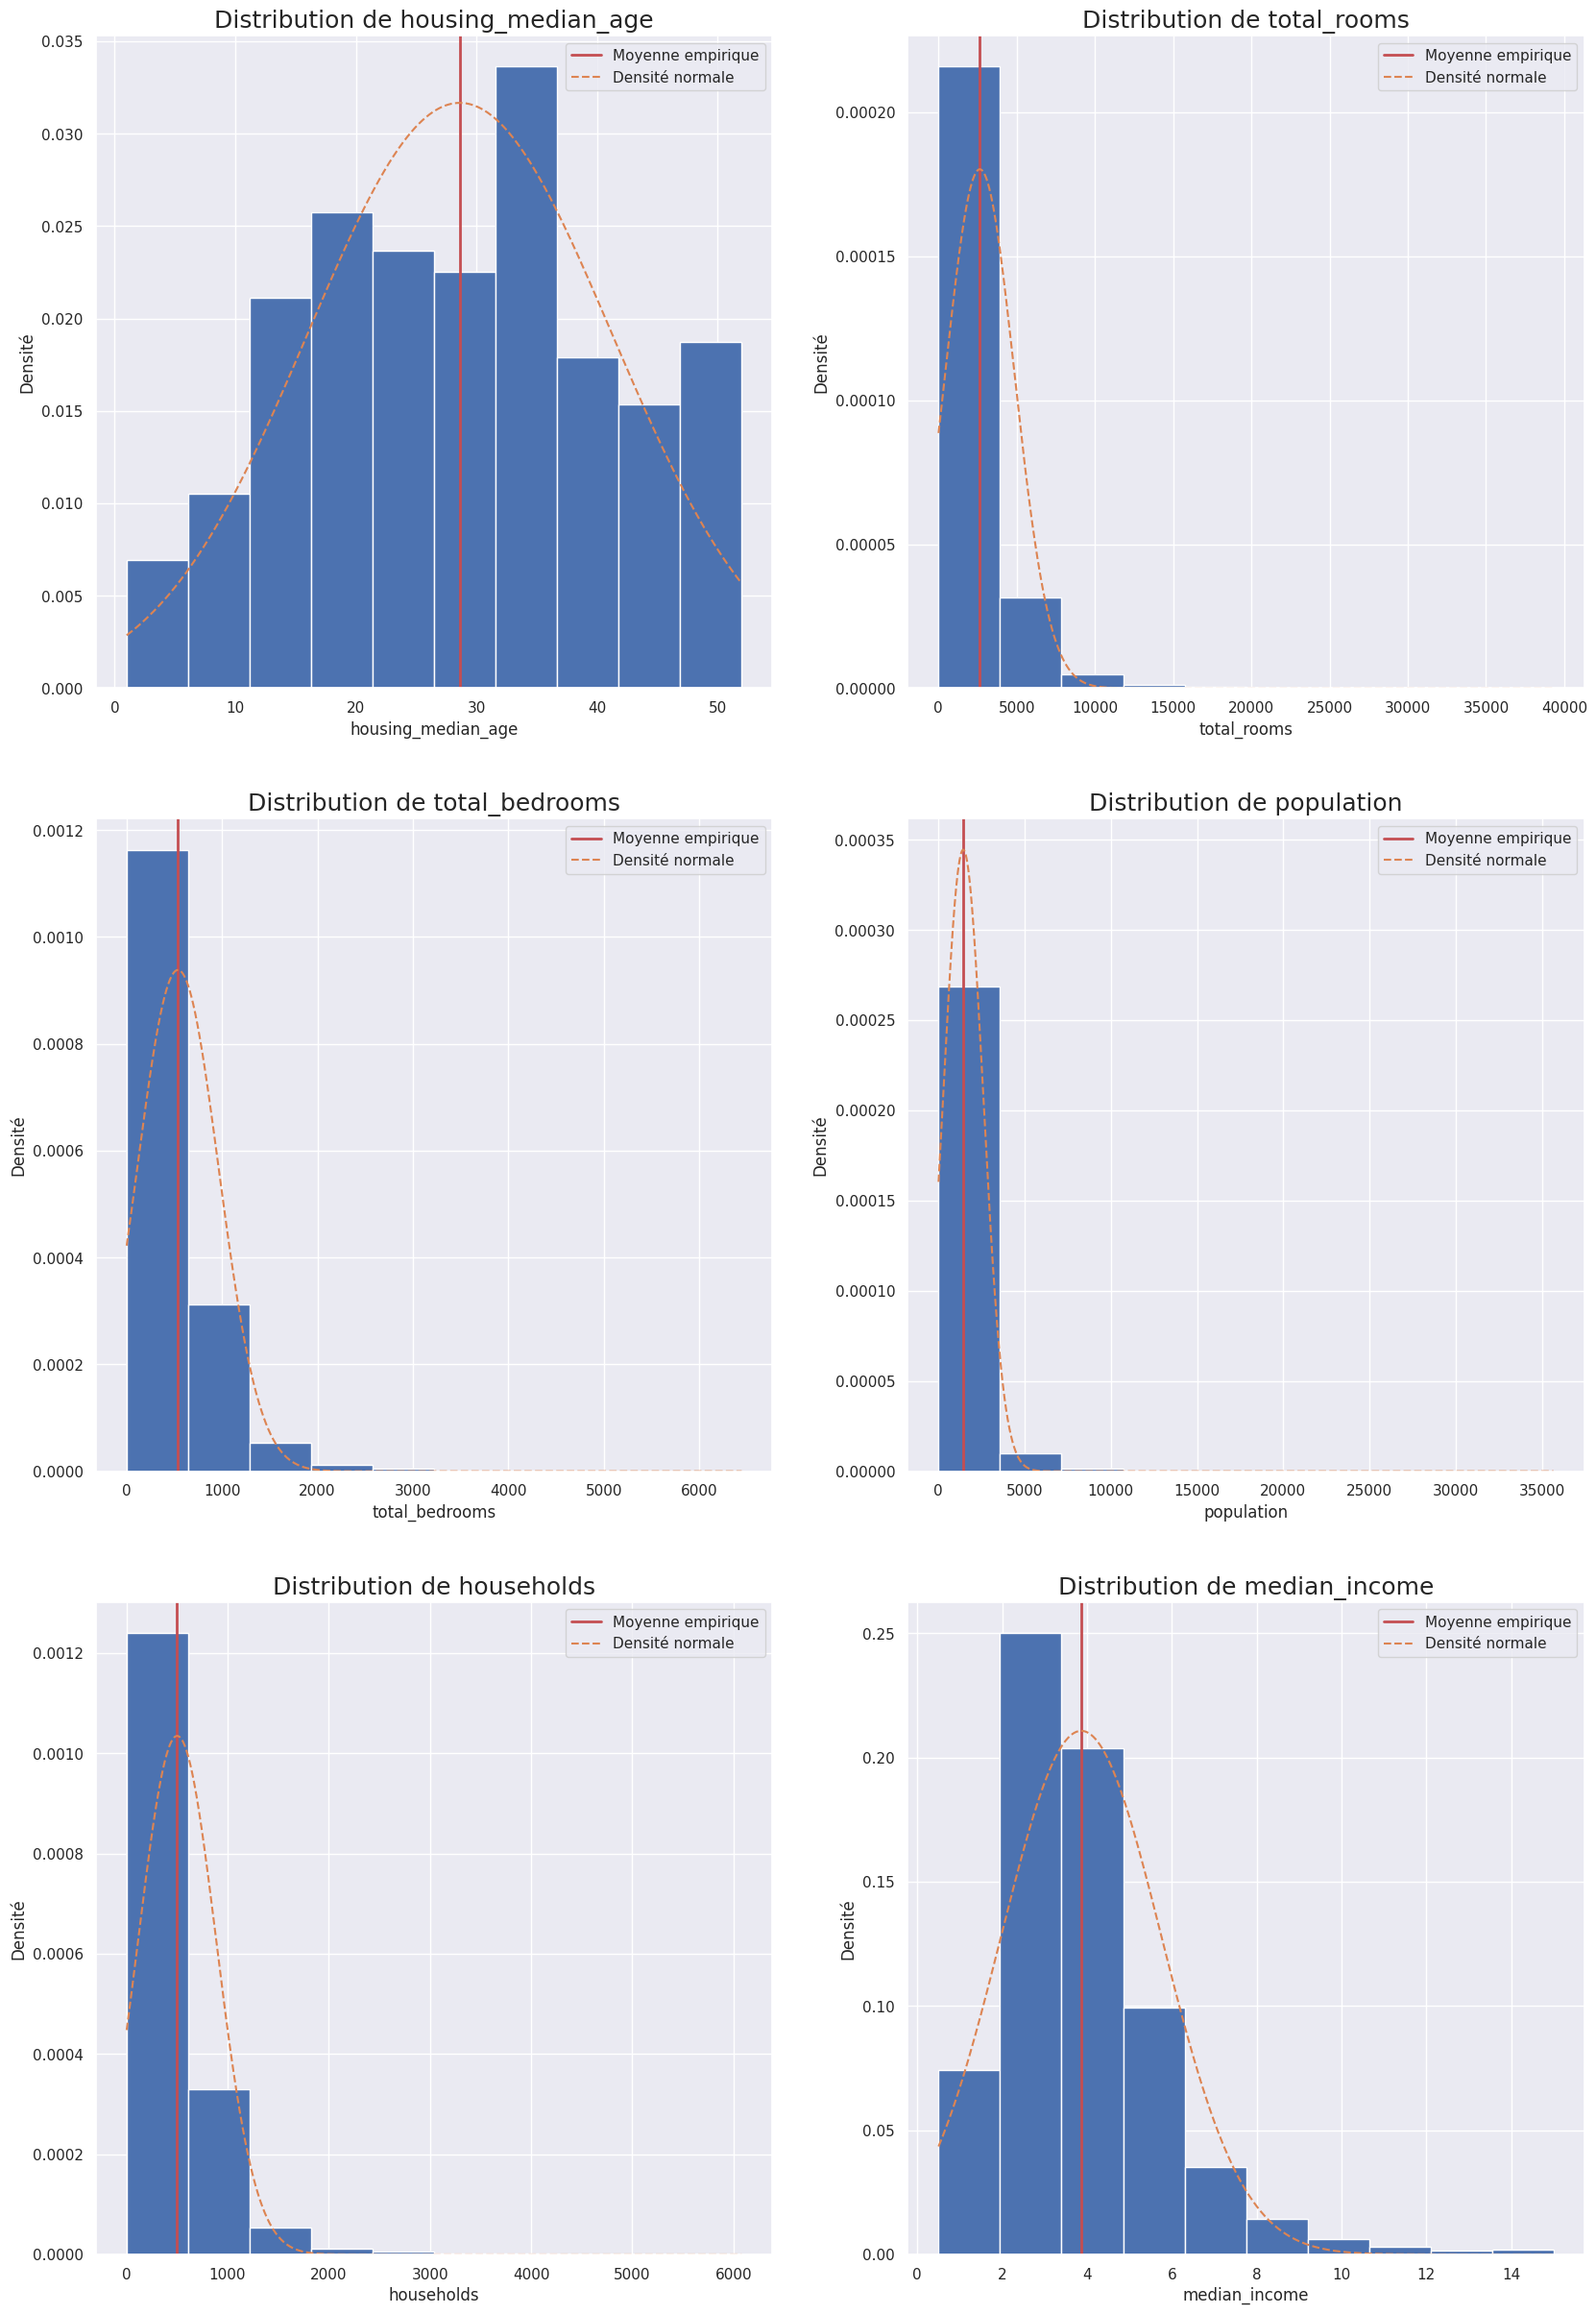

In [42]:
liste_var = ['housing_median_age','total_rooms','total_bedrooms',
               'population','households','median_income']

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for var in liste_var :
    var_hist(var, i)
    i+=1
plt.show()

## Export des données

In [43]:
immo.to_csv('immo_1i.csv',index=False, encoding='utf-8')

 # Second Nettoyage des données Projet Immo

## imputation des valeurs manquantes

Comme dit precedement les données manquante ne represente que 1 % des données. Malgrés le faible nombre de nul, j'ai decidé de tester les differentes methode d'imputation des données par sklearn.

#### Mean and Mode Imputation

In [44]:
immo_df.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
localisation            0
dtype: int64

In [45]:
import numpy as np
from sklearn.impute import SimpleImputer
df_test = immo_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_test['total_bedrooms'] = mean_imputer.fit_transform(df_test['total_bedrooms'].values.reshape(-1,1))
df_test

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  
0                 72000.0          INLAND             4  
1                274100.0       <1H OCEAN             3  
2                 58300.0          INLAND             4  
3                200000.0       <1H OCEAN             3  
4                117900.0          INLAND             4  
...                   ...             ...           ...  
16507             93800.0          INLAND             4  
16508            103100.0        NEAR BAY             2  
16509            192600.0          INLAND             4  
16510            153500.0       <1H OCEAN             3  
16511             81100.0      NEAR OCEAN             1  

[16512 rows x 12 columns]

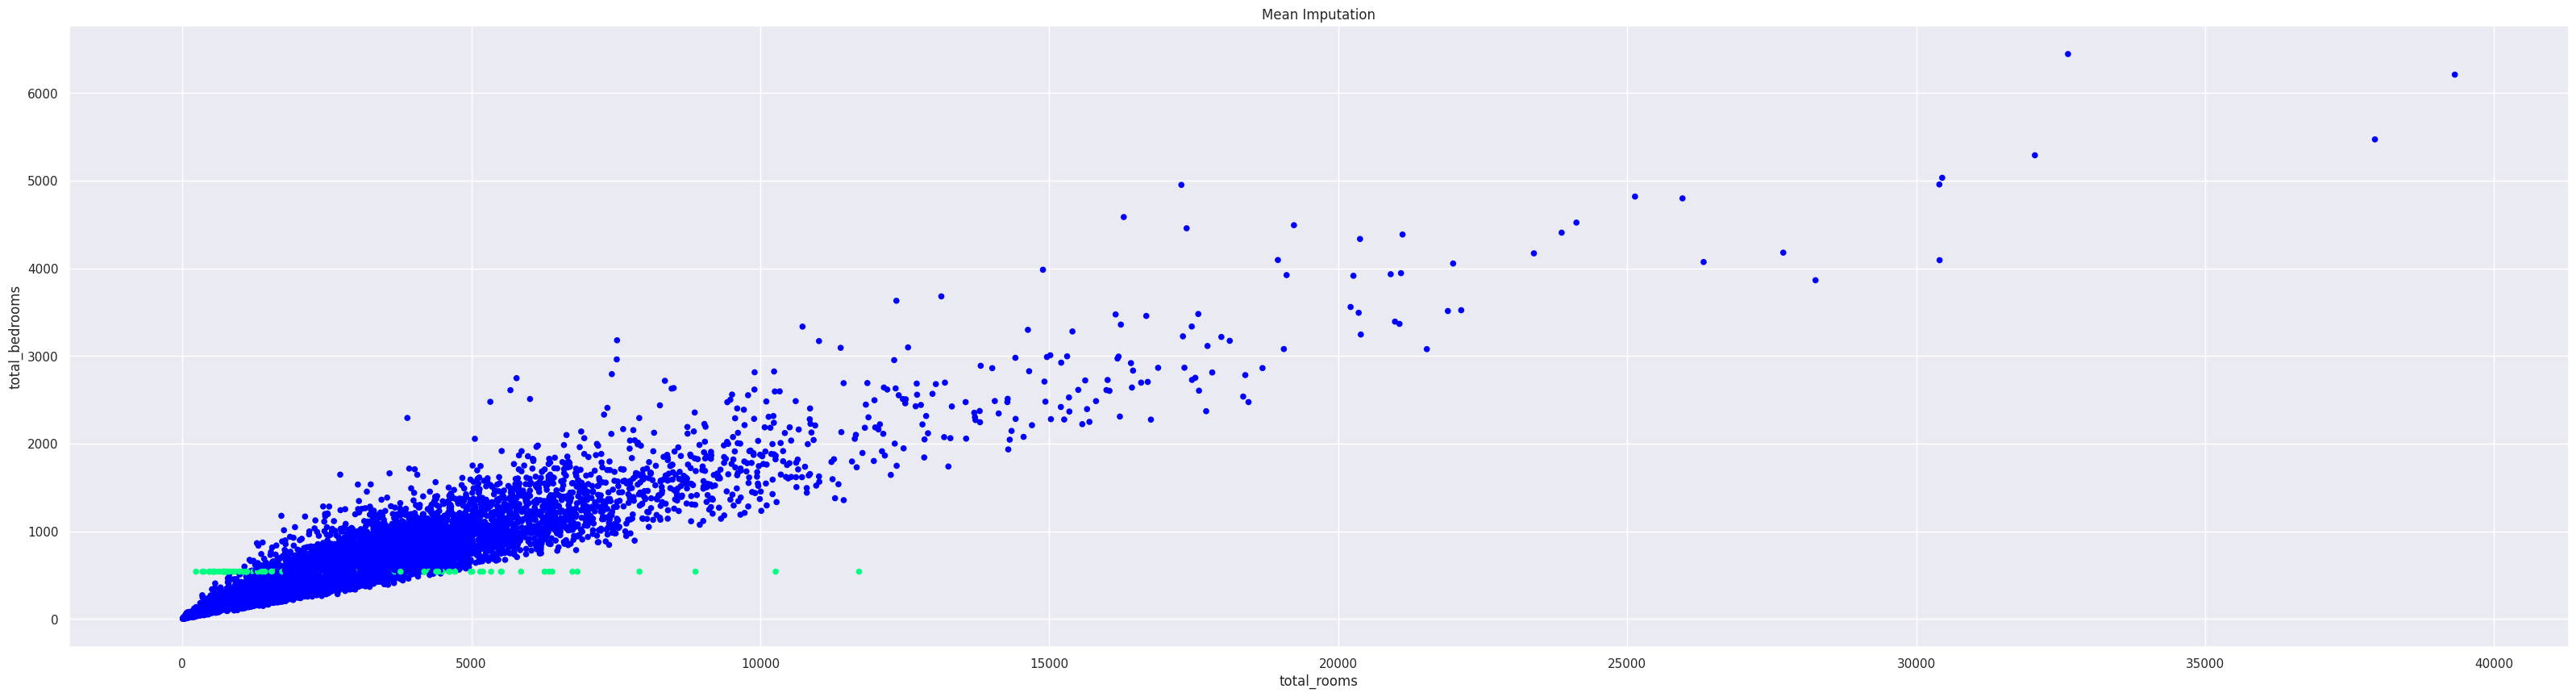

In [46]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_test.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

Les valeurs imputé sont représenter en bleu clair, on voit qu'il ne suivent pas la tendance general des points lorsque l'on plot total bedrooms et total rooms

In [47]:
df_test2 = immo_df.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
df_test2['total_bedrooms'] = mean_imputer.fit_transform(df_test2['total_bedrooms'].values.reshape(-1,1))
df_test2

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  
0                 72000.0          INLAND             4  
1                274100.0       <1H OCEAN             3  
2                 58300.0          INLAND             4  
3                200000.0       <1H OCEAN             3  
4                117900.0          INLAND             4  
...                   ...             ...           ...  
16507             93800.0          INLAND             4  
16508            103100.0        NEAR BAY             2  
16509            192600.0          INLAND             4  
16510            153500.0       <1H OCEAN             3  
16511             81100.0      NEAR OCEAN             1  

[16512 rows x 12 columns]

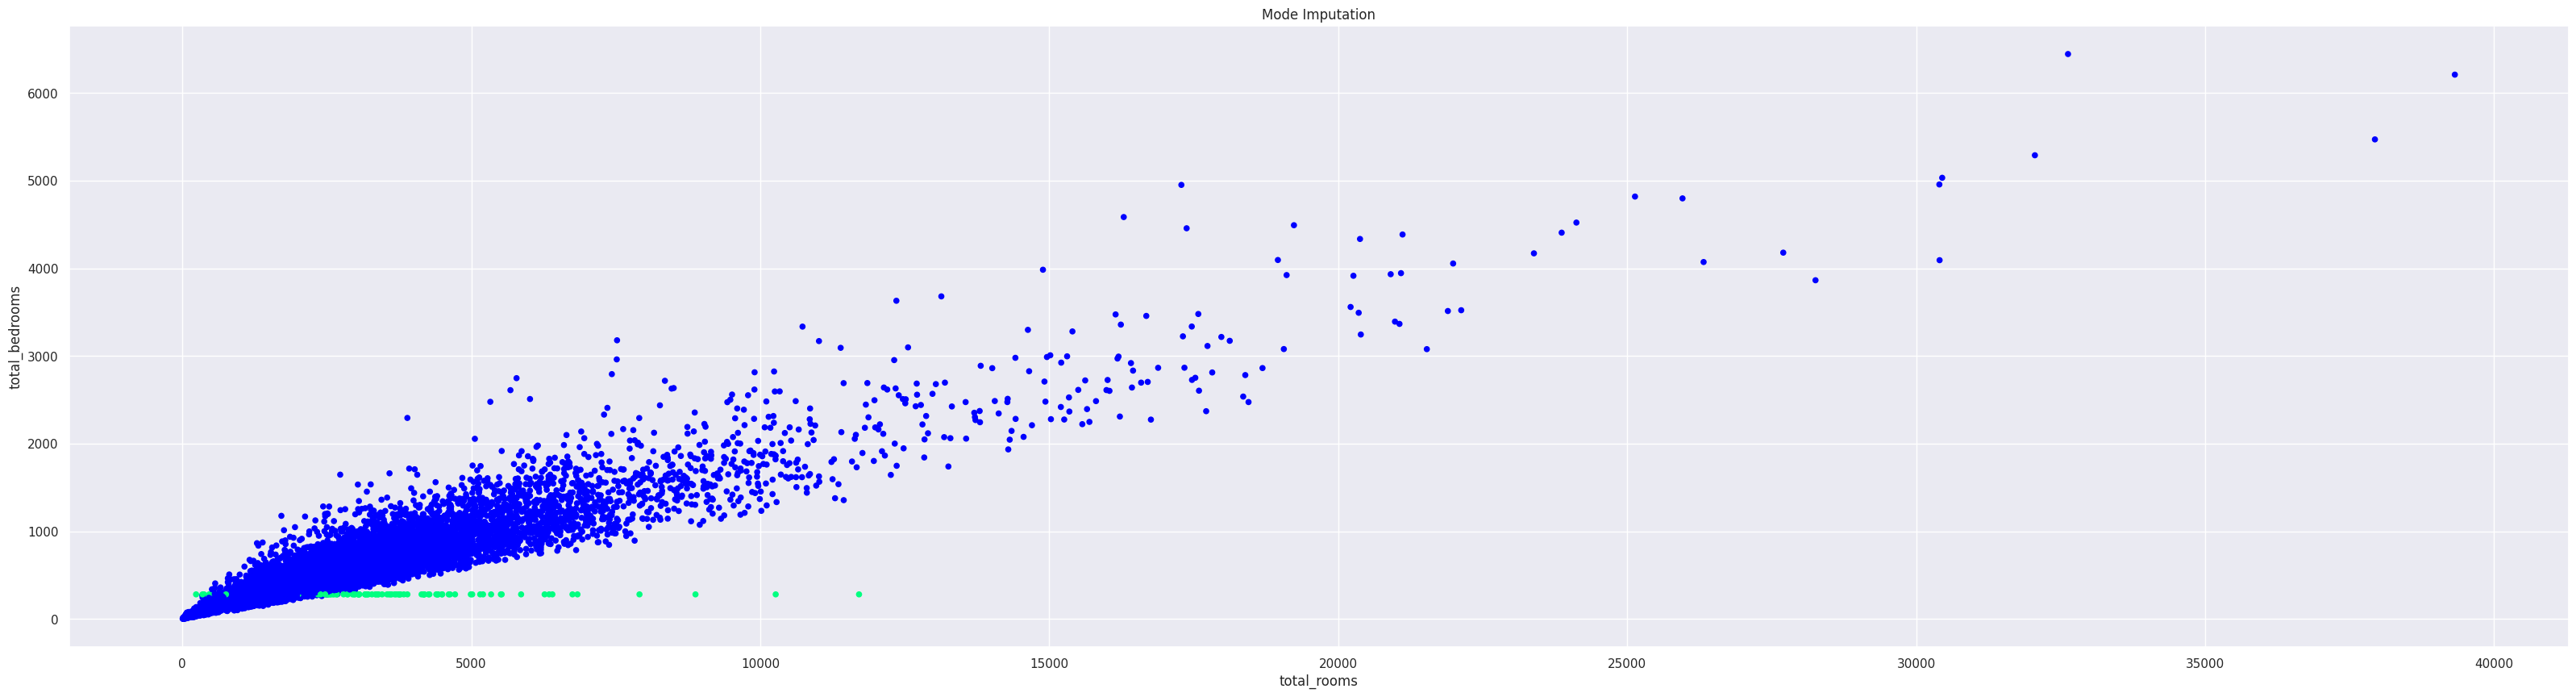

In [48]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_test2.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mode Imputation', colorbar=False)

####  K-Nearest Neighbour (KNN) Imputation

In [49]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = immo_df.filter(['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

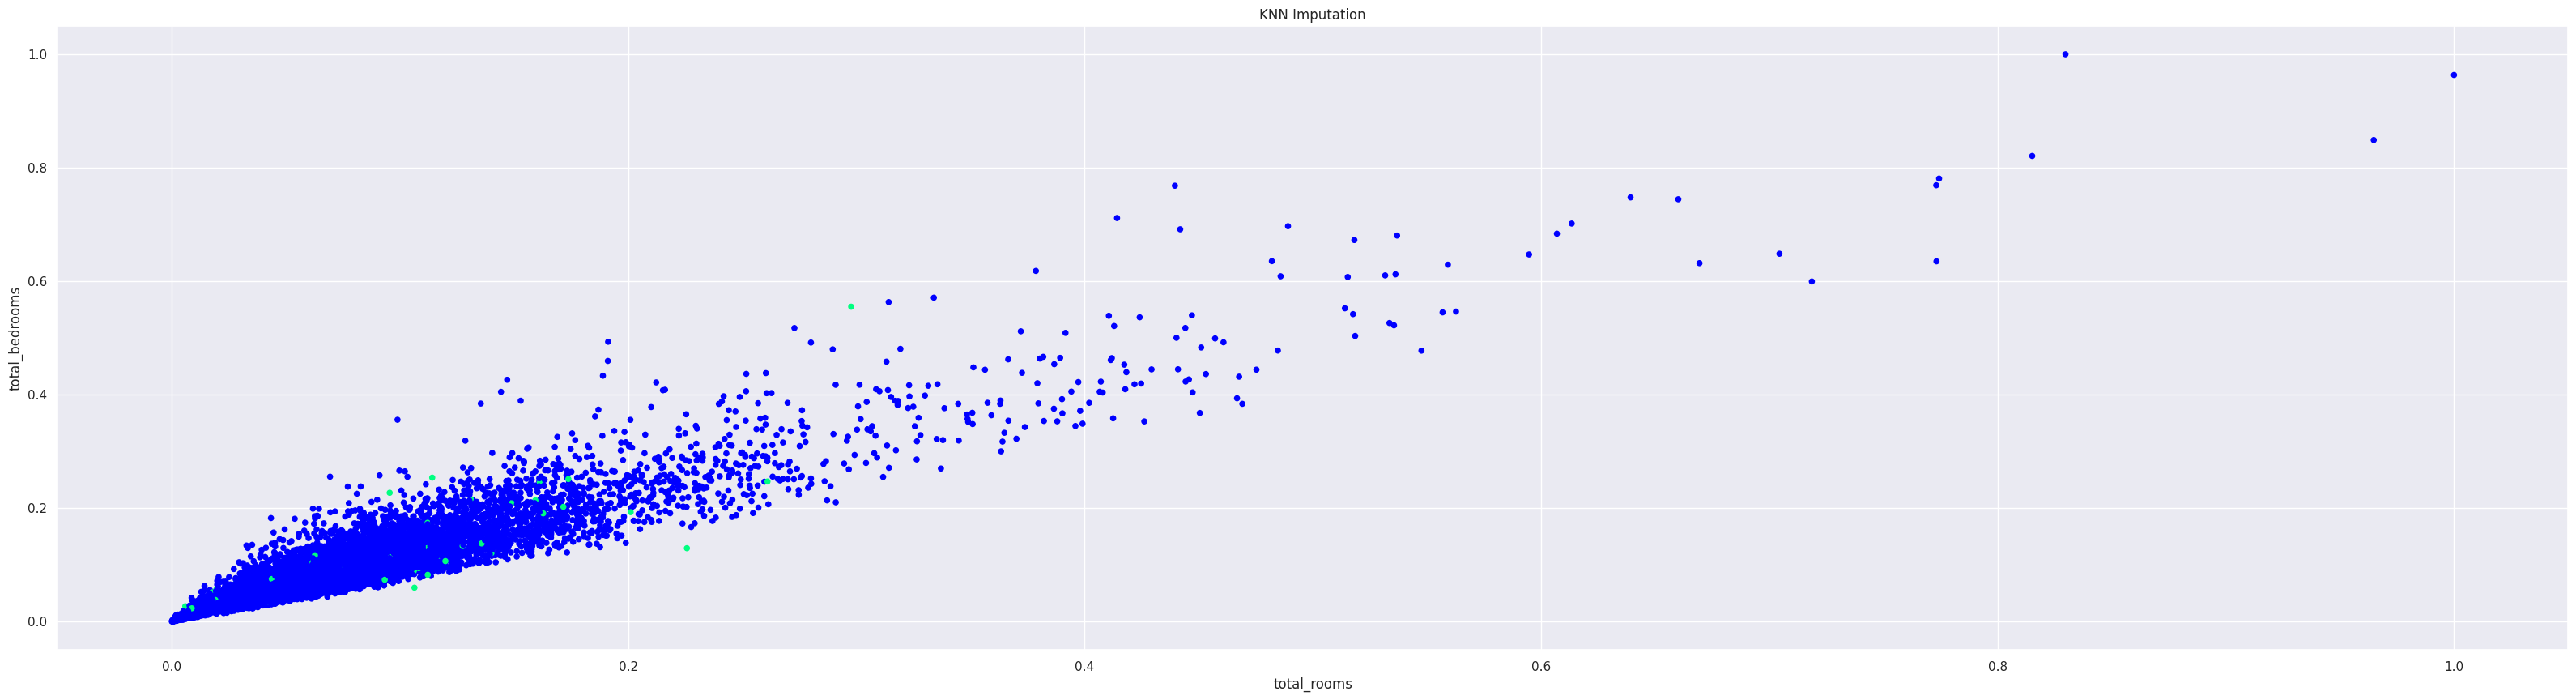

In [50]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull() 
fig = df_knn_imputed.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [51]:
df_knn_imputed

housing_median_age  total_rooms  total_bedrooms  population  \
0                0.098039     0.046981        0.073103    0.039071   
1                0.137255     0.051534        0.053857    0.024076   
2                0.470588     0.022104        0.032904    0.026010   
3                0.588235     0.015669        0.035232    0.016648   
4                0.392157     0.048736        0.057582    0.031587   
...                   ...          ...             ...         ...   
16507            0.372549     0.037111        0.042837    0.020797   
16508            0.941176     0.060004        0.077914    0.031615   
16509            0.352941     0.064226        0.071240    0.033717   
16510            0.745098     0.070458        0.130064    0.071274   
16511            0.588235     0.054586        0.071395    0.035203   

       households  median_income  median_house_value  
0        0.068257       0.067709            0.117527  
1        0.055592       0.442297            0.534227  
2        0.034868       0.072668            0.089280  
3        0.037007       0.070930            0.381444  
4        0.060855       0.247003            0.212166  
...           ...            ...                 ...  
16507    0.040789       0.176729            0.162476  
16508    0.075000       0.145750            0.181651  
16509    0.070230       0.275576            0.366186  
16510    0.126809       0.143108            0.285568  
16511    0.068750       0.120543            0.136290  

[16512 rows x 7 columns]

#### Multivariate Imputation by Chained Equation — MICE

In [52]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = immo_df.filter(['index','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','localisation'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)


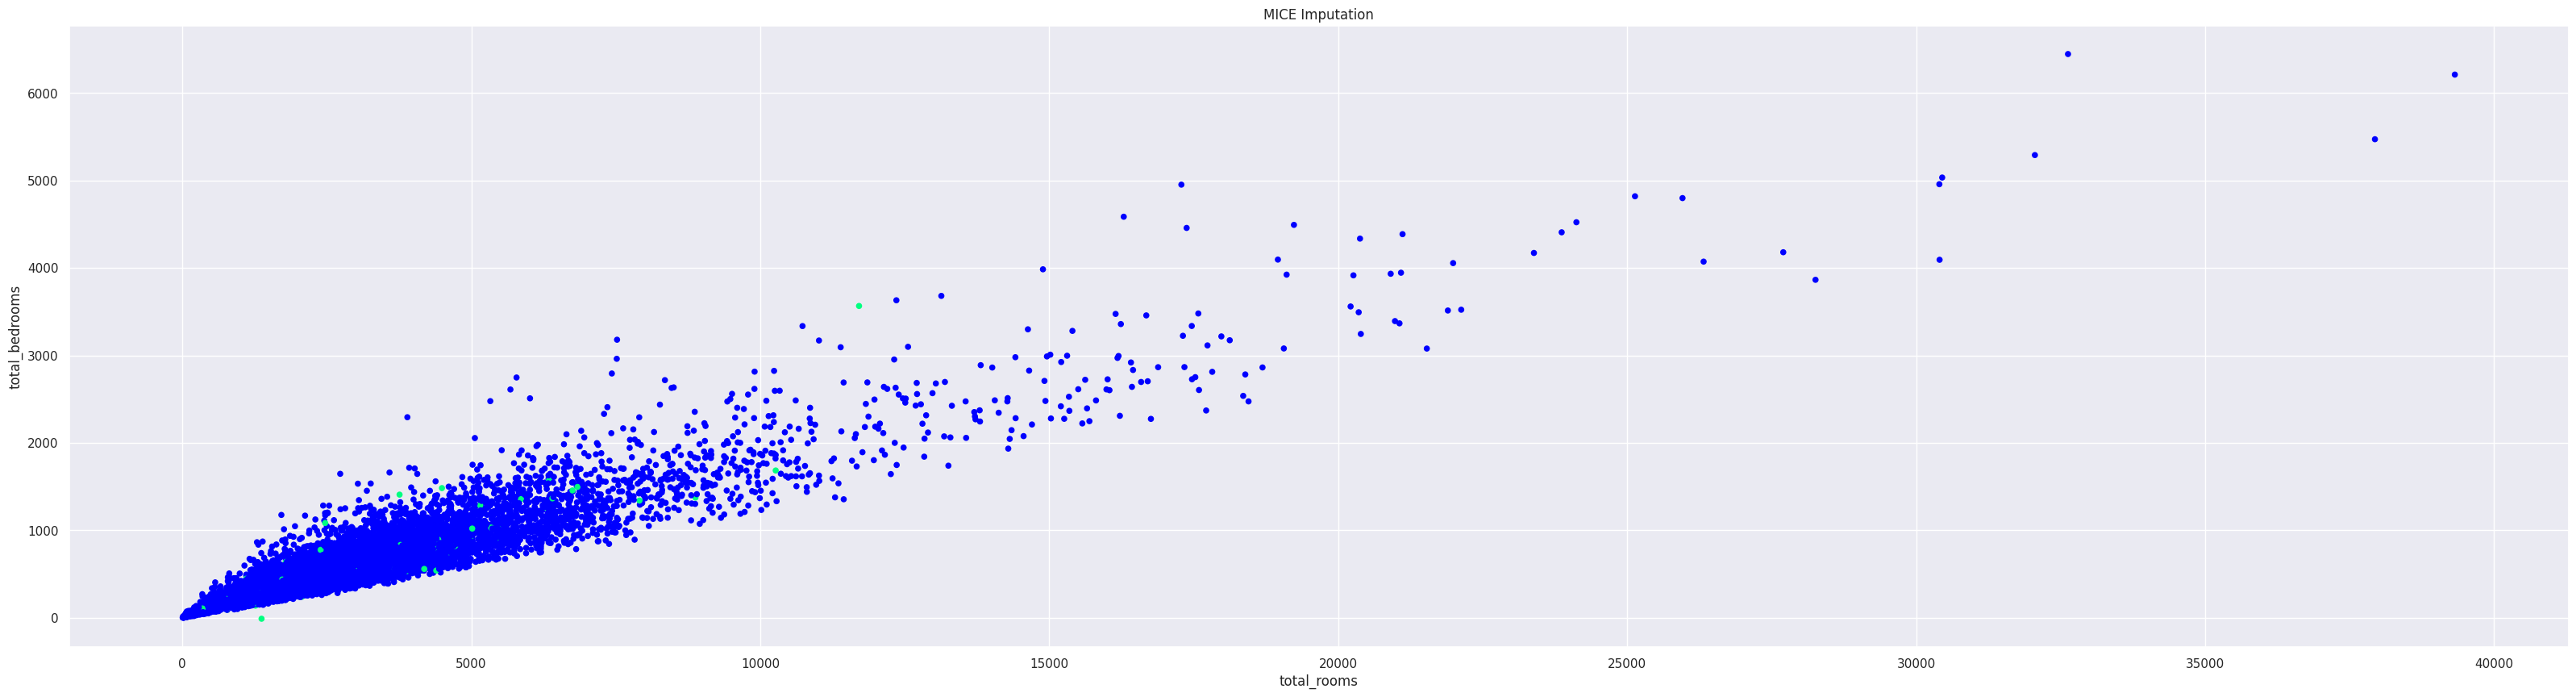

In [53]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_mice_imputed.plot(x='total_rooms', y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

In [54]:
df_mice_imputed

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072.0    -119.84     36.77                 6.0       1853.0   
1      10600.0    -117.80     33.68                 8.0       2032.0   
2       2494.0    -120.19     36.60                25.0        875.0   
3       4284.0    -118.32     34.10                31.0        622.0   
4      16541.0    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507   1099.0    -121.90     39.59                20.0       1465.0   
16508  18898.0    -122.25     38.11                49.0       2365.0   
16509  11798.0    -121.22     38.92                19.0       2531.0   
16510   6637.0    -118.14     34.16                39.0       2776.0   
16511   2575.0    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  localisation  
0                 72000.0           4.0  
1                274100.0           3.0  
2                 58300.0           4.0  
3                200000.0           3.0  
4                117900.0           4.0  
...                   ...           ...  
16507             93800.0           4.0  
16508            103100.0           2.0  
16509            192600.0           4.0  
16510            153500.0           3.0  
16511             81100.0           1.0  

[16512 rows x 11 columns]

In [55]:
immo_df2= df_mice_imputed.copy()
immo_df2

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072.0    -119.84     36.77                 6.0       1853.0   
1      10600.0    -117.80     33.68                 8.0       2032.0   
2       2494.0    -120.19     36.60                25.0        875.0   
3       4284.0    -118.32     34.10                31.0        622.0   
4      16541.0    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507   1099.0    -121.90     39.59                20.0       1465.0   
16508  18898.0    -122.25     38.11                49.0       2365.0   
16509  11798.0    -121.22     38.92                19.0       2531.0   
16510   6637.0    -118.14     34.16                39.0       2776.0   
16511   2575.0    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  localisation  
0                 72000.0           4.0  
1                274100.0           3.0  
2                 58300.0           4.0  
3                200000.0           3.0  
4                117900.0           4.0  
...                   ...           ...  
16507             93800.0           4.0  
16508            103100.0           2.0  
16509            192600.0           4.0  
16510            153500.0           3.0  
16511             81100.0           1.0  

[16512 rows x 11 columns]

In [56]:
immo_df2.to_csv('immo_df2.csv',index=False, encoding='utf-8')

 # troisieme Nettoyage des données Projet Immo